# MultiOmics RNA + ATAC for Chao dataset (MORNAATACC) technical documentation
## Multiomics RNAseq & ATACseq on EAE model

<hr>

**This notebook is the following of MORNAATACC_6 notebook & MORNAATACCOL_2**

<hr>

In [ ]:
#Memory needed for a full run : 256Gb

In [34]:
#Early1               = P21208_1003_EAE_ARC
#PeakCtrl2            = P21208_1004_EAE_ARC
#Peak2                = P21208_1005_EAE_ARC
#LateCtrl1            = MORNAATACC_1002 (P21520_1002)
#Late1                = MORNAATACC_1003 (P21520_1003)
#Early2               = P23605_1001
#EarlyCtrl2           = P23605_1002
#Peak3                = P23605_1003
#PeakCtrl3            = P23605_1004
#EarlyCtrl3           = P24115_1001
#EarlyFemale3         = P24115_1002
#EarlyMale3           = P24115_1003
#Late2                = P25316_1001
#LateCtrl2            = P25316_1002
#Late3                = P25316_1003
#LateCtrl3            = P25316_1004
#PeakMale4            = P27208_1001
#PeakFemale4          = P27208_1002
#LateMale4            = P27208_1003
#LateFemale4          = P27208_1004
#Naive1               = P26203_1003
#Naive2               = P26203_1004
#Peak5                = P29557_1001
#Late5                = P29557_1002
#Naive3               = P29557_1004
#EarlyCtrl4           = P29557_1005
#EarlyCtrlMale5       = P29557_1006
#EarlyCtrlFemale5     = P29557_1007
#Early4               = P29557_1008
#EarlyMale5           = P29557_1009
#EarlyFemale5         = P29557_1010

## 0. Environment status

In [1]:
%use

Subkernel,Kernel Name,Language,Language Module,Interpreter
Bash,bash,bash,sos_bash,/usr/bin/python3
Bash,calysto_bash,bash,sos_bash,python
Python3,python3,python,sos_python,python
R,ir,R,sos_r,/usr/lib/R/bin/R
SoS,sos,sos,,/usr/bin/python3


In [2]:
lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04 LTS
Release:	20.04
Codename:	focal


In [3]:
lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
Address sizes:       46 bits physical, 48 bits virtual
CPU(s):              16
On-line CPU(s) list: 0-15
Thread(s) per core:  1
Core(s) per socket:  8
Socket(s):           2
NUMA node(s):        2
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz
Stepping:            2
CPU MHz:             1206.591
CPU max MHz:         3200.0000
CPU min MHz:         1200.0000
BogoMIPS:            4799.57
Virtualization:      VT-x
L1d cache:           512 KiB
L1i cache:           512 KiB
L2 cache:            4 MiB
L3 cache:            40 MiB
NUMA node0 CPU(s):   0-7
NUMA node1 CPU(s):   8-15
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cm
                     ov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pb
                     e syscall nx pdpe1gb rdtscp lm constant_tsc

In [4]:
grep MemTotal /proc/meminfo | awk '{print $2 / 1024}'

257675


In [5]:
apt list --installed

Listing... Done
adduser/focal,now 3.118ubuntu2 all [installed]
apt-transport-https/focal-security,now 2.0.2ubuntu0.2 all [installed]
apt/focal-security,now 2.0.2ubuntu0.2 amd64 [installed]
autoconf/focal,now 2.69-11.1 all [installed,automatic]
automake/focal,now 1:1.16.1-4ubuntu6 all [installed,automatic]
autotools-dev/focal,now 20180224.1 all [installed,automatic]
base-files/focal,now 11ubuntu5 amd64 [installed]
base-passwd/focal,now 3.5.47 amd64 [installed]
bash/focal,now 5.0-6ubuntu1 amd64 [installed,upgradable to: 5.0-6ubuntu1.2]
binutils-common/focal-security,now 2.34-6ubuntu1.3 amd64 [installed,automatic]
binutils-x86-64-linux-gnu/focal-security,now 2.34-6ubuntu1.3 amd64 [installed,automatic]
binutils/focal-security,now 2.34-6ubuntu1.3 amd64 [installed,automatic]
bsdutils/focal,now 1:2.34-0.1ubuntu9 amd64 [installed,upgradable to: 1:2.34-0.1ubuntu9.3]
build-essential/focal,now 12.8ubuntu1 amd64 [installed]
bzip2/focal,now 1.0.8-2 amd64 [installed,automatic]
ca-certificates-java/f

In [14]:
pip list

Package                  Version             
------------------------ --------------------
anndata                  0.8.0               
ansiwrap                 0.8.4               
anyio                    3.6.2               
argon2-cffi              21.3.0              
argon2-cffi-bindings     21.2.0              
asttokens                2.2.1               
attrs                    22.1.0              
Babel                    2.11.0              
backcall                 0.2.0               
bash-kernel              0.7.2               
beautifulsoup4           4.11.1              
bleach                   5.0.1               
calysto-bash             0.2.2               
certifi                  2019.11.28          
cffi                     1.15.1              
chardet                  3.0.4               
charset-normalizer       2.1.1               
click                    8.1.3               
comm                     0.1.2               
contourpy                1.0.6    

In [15]:
jupyter --version

Selected Jupyter core packages...
IPython          : 8.7.0
ipykernel        : 6.19.2
ipywidgets       : 8.0.3
jupyter_client   : 7.4.8
jupyter_core     : 5.1.0
jupyter_server   : 1.21.0
jupyterlab       : 3.1.17
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.7.0
notebook         : 6.5.2
qtconsole        : 5.4.0
traitlets        : 5.4.0


In [1]:
#conda env export -n jupyter

## 1. Loading environments

### 1.1 R Packages

In [1]:
library(Seurat)
library(Signac)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(stringr)
library(harmony)
library(clustree)
library(data.table)
library(biomaRt)
library(cowplot)
library(randomForest)
library(mlbench)
library(caret)
library(e1071)
library(ggplot2)
library(tidyverse)
library(pheatmap)
library(grid)
library(gridExtra)
library(patchwork)
library(biovizBase)
library(ggrepel)
library(viridis)
library(reshape2)
library(hues)
library(clusterProfiler)
library(org.Mm.eg.db)
library(ggnewscale)
library(circlize)
library(scales)
library(lisi)

#Multicore
library(future)
library(future.apply)

#conda dependencies trouble
library(enrichplot)
library(ReactomePA)

#Doublet determination
#Cannot be installed through conda
library(DoubletFinder)

library(textclean)
library(mclust)

#ArchR
library(ArchR)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)

#Bigwig
library(pbapply)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading require

In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.10.0 
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.10.0

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] pbapply_1.7-2                            
 [2] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0
 [3] rhdf5_2.46.1                             
 [4] SummarizedExperiment_1.32.0              
 [5] MatrixGenerics_1.14.0                    
 [6] Matrix_1.6-5                             
 [7] 

### 1.2 Functions

In [14]:
PrctCellExpringGene <- function(object, genes, group.by = "all"){
    if(group.by == "all"){
        prct = unlist(lapply(genes,calc_helper, object=object))
        result = data.frame(Markers = genes, Cell_proportion = prct)
        return(result)
    }

    else{        
        list = SplitObject(object, group.by)
        factors = names(list)

        results = lapply(list, PrctCellExpringGene, genes=genes)
        for(i in 1:length(factors)){
        results[[i]]$Feature = factors[i]
        }
        combined = do.call("rbind", results)
        return(combined)
    }
}

calc_helper <- function(object,genes){
    counts = object[['RNA']]@counts
    ncells = ncol(counts)
    if(genes %in% row.names(counts)){
    sum(counts[genes,]>0)/ncells
    }else{return(NA)}
}

NbCellExpringGene <- function(object, genes, group.by = "all"){
    if(group.by == "all"){
        nb = unlist(lapply(genes,calc_helper_nb, object=object))
        result = data.frame(Markers = genes, Cell_nb = nb)
        return(result)
    }

    else{        
        list = SplitObject(object, group.by)
        factors = names(list)

        results = lapply(list, NbCellExpringGene, genes=genes)
        for(i in 1:length(factors)){
        results[[i]]$Feature = factors[i]
        }
        combined = do.call("rbind", results)
        return(combined)
    }
}

calc_helper_nb <- function(object,genes){
    counts = object[['RNA']]@counts
    if(genes %in% row.names(counts)){
    length(counts[genes,][counts[genes,] > 0])
    }else{return(NA)}
}

DoMultiBarHeatmap <- function (object, features = NULL, cells = NULL, group.by = "ident", additional.group.by = NULL, additional.group.sort.by = NULL,  cols.use = NULL, group.bar = TRUE, disp.min = -2.5, disp.max = NULL, layer = "scale.data", assay = NULL, label = TRUE, size = 5.5, hjust = 0, angle = 45, raster = TRUE, draw.lines = TRUE, lines.width = NULL, group.bar.height = 0.02, combine = TRUE){

  cells <- cells %||% colnames(x = object)
  if (is.numeric(x = cells)) {
    cells <- colnames(x = object)[cells]
  }
  assay <- assay %||% DefaultAssay(object = object)
  DefaultAssay(object = object) <- assay
  features <- features %||% VariableFeatures(object = object)
  ## Why reverse???
  features <- rev(x = unique(x = features))
  disp.max <- disp.max %||% ifelse(test = layer == "scale.data", yes = 2.5, no = 6)
  possible.features <- rownames(x = LayerData(object = object, assay = assay, layer = layer))
  if (any(!features %in% possible.features)) {
    bad.features <- features[!features %in% possible.features]
    features <- features[features %in% possible.features]
    if (length(x = features) == 0) {
      stop("No requested features found in the ", layer,
      " slot for the ", assay, " assay.")
    }
    warning("The following features were omitted as they were not found in the ", layer, " slot for the ", assay, " assay: ", paste(bad.features, collapse = ", "))
  }

  if (!is.null(additional.group.sort.by)) {
    if (any(!additional.group.sort.by %in% additional.group.by)) {
      bad.sorts <- additional.group.sort.by[!additional.group.sort.by %in% additional.group.by]
      additional.group.sort.by <- additional.group.sort.by[additional.group.sort.by %in% additional.group.by]
      if (length(x = bad.sorts) > 0) {
        warning("The following additional sorts were omitted as they were not a subset of additional.group.by : ",
        paste(bad.sorts, collapse = ", "))
      }
    }
  }

  data <- as.data.frame(x = as.matrix(x = t(x = LayerData(object = object, assay = assay, layer = layer)[features, cells, drop = FALSE])))

  object <- suppressMessages(expr = StashIdent(object = object, save.name = "ident"))
  group.by <- group.by %||% "ident"
  groups.use <- object[[c(group.by, additional.group.by[!additional.group.by %in% group.by])]][cells, , drop = FALSE]
  plots <- list()
  for (i in group.by) {
    data.group <- data
    if (!is.null(additional.group.by)) {
      additional.group.use <- additional.group.by[additional.group.by!=i]
      if (!is.null(additional.group.sort.by)){
        additional.sort.use = additional.group.sort.by[additional.group.sort.by != i]
      } else {
        additional.sort.use = NULL
      }
    } else {
      additional.group.use = NULL
      additional.sort.use = NULL
    }

    group.use <- groups.use[, c(i, additional.group.use), drop = FALSE]

    for(colname in colnames(group.use)){
      if (!is.factor(x = group.use[[colname]])) {
        group.use[[colname]] <- factor(x = group.use[[colname]])
      }
    }

    if (draw.lines) {
      lines.width <- lines.width %||% ceiling(x = nrow(x = data.group) * 0.0025)
      placeholder.cells <- sapply(X = 1:(length(x = levels(x = group.use[[i]])) * lines.width), FUN = function(x) {
        return(Seurat:::RandomName(length = 20))
      })
      placeholder.groups <- data.frame(rep(x = levels(x = group.use[[i]]), times = lines.width))
      group.levels <- list()
      group.levels[[i]] = levels(x = group.use[[i]])
      for (j in additional.group.use) {
        group.levels[[j]] <- levels(x = group.use[[j]])
        placeholder.groups[[j]] = NA
      }

      colnames(placeholder.groups) <- colnames(group.use)
      rownames(placeholder.groups) <- placeholder.cells

      group.use <- sapply(group.use, as.vector)
      rownames(x = group.use) <- cells

      group.use <- rbind(group.use, placeholder.groups)

      for (j in names(group.levels)) {
        group.use[[j]] <- factor(x = group.use[[j]], levels = group.levels[[j]])
      }

      na.data.group <- matrix(data = NA, nrow = length(x = placeholder.cells), ncol = ncol(x = data.group), dimnames = list(placeholder.cells, colnames(x = data.group)))
      data.group <- rbind(data.group, na.data.group)
    }

    order_expr <- paste0('order(', paste(c(i, additional.sort.use), collapse=','), ')')
    group.use = with(group.use, group.use[eval(parse(text=order_expr)), , drop=F])

    plot <- Seurat:::SingleRasterMap(data = data.group, raster = raster, disp.min = disp.min, disp.max = disp.max, feature.order = features, cell.order = rownames(x = group.use), group.by = group.use[[i]])

    if (group.bar) {
      pbuild <- ggplot_build(plot = plot)
      group.use2 <- group.use
      cols <- list()
      na.group <- Seurat:::RandomName(length = 20)
      for (colname in rev(x = colnames(group.use2))) {
        if (colname == i) {
          colid = paste0('Identity (', colname, ')')
        } else {
          colid = colname
        }

        # Default
        cols[[colname]] <- c(scales::hue_pal()(length(x = levels(x = group.use[[colname]]))))

        #Overwrite if better value is provided
        if (!is.null(cols.use[[colname]])) {
          req_length = length(x = levels(group.use))
          if (length(cols.use[[colname]]) < req_length){
            warning("Cannot use provided colors for ", colname, " since there aren't enough colors.")
          } else {
            if (!is.null(names(cols.use[[colname]]))) {
              if (all(levels(group.use[[colname]]) %in% names(cols.use[[colname]]))) {
                cols[[colname]] <- as.vector(cols.use[[colname]][levels(group.use[[colname]])])
              } else {
                warning("Cannot use provided colors for ", colname, " since all levels (", paste(levels(group.use[[colname]]), collapse=","), ") are not represented.")
              }
            } else {
              cols[[colname]] <- as.vector(cols.use[[colname]])[c(1:length(x = levels(x = group.use[[colname]])))]
            }
          }
        }

        # Add white if there's lines
        if (draw.lines) {
          levels(x = group.use2[[colname]]) <- c(levels(x = group.use2[[colname]]), na.group)
          group.use2[placeholder.cells, colname] <- na.group
          cols[[colname]] <- c(cols[[colname]], "#FFFFFF")
        }
        names(x = cols[[colname]]) <- levels(x = group.use2[[colname]])

        y.range <- diff(x = pbuild$layout$panel_params[[1]]$y.range)
        y.pos <- max(pbuild$layout$panel_params[[1]]$y.range) + y.range * 0.015
        y.max <- y.pos + group.bar.height * y.range
        pbuild$layout$panel_params[[1]]$y.range <- c(pbuild$layout$panel_params[[1]]$y.range[1], y.max)

        plot <- suppressMessages(plot +
          annotation_raster(raster = t(x = cols[[colname]][group.use2[[colname]]]),  xmin = -Inf, xmax = Inf, ymin = y.pos, ymax = y.max) +
          annotation_custom(grob = grid::textGrob(label = colid, hjust = 0, gp = gpar(cex = 0.75)), ymin = mean(c(y.pos, y.max)), ymax = mean(c(y.pos, y.max)), xmin = Inf, xmax = Inf) +
          coord_cartesian(ylim = c(0, y.max), clip = "off")
        )


        if ((colname == i) && label) {
          x.max <- max(pbuild$layout$panel_params[[1]]$x.range)
          x.divs <- pbuild$layout$panel_params[[1]]$x.major %||% pbuild$layout$panel_params[[1]]$x$break_positions()
          group.use$x <- x.divs

          label.x.pos <- tapply(X = group.use$x, INDEX = group.use[[colname]], FUN = median) * x.max
          label.x.pos <- data.frame(group = names(x = label.x.pos), label.x.pos)
          plot <- plot + geom_text(stat = "identity", data = label.x.pos, aes_string(label = "group", x = "label.x.pos"), y = y.max + y.max *  0.03 * 0.5, angle = angle, hjust = hjust, size = size)
          plot <- suppressMessages(plot + coord_cartesian(ylim = c(0, y.max + y.max * 0.002 * max(nchar(x = levels(x = group.use[[colname]]))) * size), clip = "off"))
        }
      }
    }
    plot <- plot + theme(line = element_blank())
    plots[[i]] <- plot
  }
  if (combine) {
    plots <- CombinePlots(plots = plots)
  }
  return(plots)
}


#####################################################
# Function for getting the marker peaks from the Seurat
# object, based on the current ident
#####################################################
getMarkerPeaks <- function(obj, doublets, n_peaks = 100, min_cells = 200){

  n_clusters = length(unique(as.vector(Idents(obj))))
  
  cells <- Cells(obj)
  
  # remove the doublet cells for better marker peaks
  obj <- subset(obj, cells = cells[!cells %in% doublets])
  
  obj@assays$ATAC@data@x <- obj@assays$ATAC@counts@x
  
  # default preporcessing o Signac applied
  obj <- RunTFIDF(obj, verbose = F)
  obj <- FindTopFeatures(obj, min.cutoff = NULL, verbose = F)
  obj <- RunSVD(
    object = obj,
    reduction.key = 'SVD_',
    reduction.name = 'svd',
    seed.use = 1,
    verbose = F
  )
  
  # get the marker peaks between all clusters
  da_peaks <- FindAllMarkers(
    object = obj,
    slot = "data",
    min.pct = 0.1,
    only.pos = TRUE,
    test.use = 'LR',
    min.cells.group = min_cells,
    verbose = F
  )
  
  # only keep the significant peaks
  metadata = lapply(unique(da_peaks$cluster), function(x){
    return(data.frame(da_peaks[da_peaks$p_val_adj < 0.05 & da_peaks$cluster == x,]))
  })
  
  names(metadata) <- paste0("Cluster_", unique(da_peaks$cluster))
  
  rm(da_peaks)
  
  meta_peaks = data.frame()
  
  for (i in names(metadata)) {
    
    cur_meta = data.frame(metadata[[i]])
    cur_meta$peaks = row.names(metadata[[i]])
    cur_meta$cluster = i
    row.names(cur_meta) = c()
    
    meta_peaks = rbind(meta_peaks, cur_meta)
    
    rm(cur_meta)
    
  }
  
  # sort the peaks based on the fold changes and signifigance, choose ones with high FC first
  meta_peaks = meta_peaks[order(meta_peaks$avg_logFC, -meta_peaks$p_val_adj, decreasing = T),]
  
  marker_peaks_set = data.frame(matrix(ncol=2,nrow=0, dimnames=list(NULL, c("gene", "cluster"))))
  
  # extract 100 marker peaks for each cluster
  while(nrow(marker_peaks_set) < n_peaks*n_clusters) {
    
    temp = meta_peaks[1, c("gene", "cluster")]
    
    marker_peaks_set = rbind(marker_peaks_set, temp)
    
    meta_peaks = meta_peaks[which(meta_peaks$gene != temp$gene),]
    
    if(length(which(marker_peaks_set$cluster == temp$cluster)) == n_peaks){
      meta_peaks = meta_peaks[which(meta_peaks$cluster != temp$cluster),]
    }
    
    rm(temp)
  }
  
  marker_peaks_set = marker_peaks_set[!is.na(marker_peaks_set$gene),]
  
  marker_peaks_set$cluster= factor(marker_peaks_set$cluster, levels = str_sort(unique(marker_peaks_set$cluster), numeric = T))
  marker_peaks_set = marker_peaks_set[order(marker_peaks_set$cluster),]
  
  rm(meta_peaks)
  
  colnames(marker_peaks_set)[1]<- "peaks"
  
  return(marker_peaks_set)
}

############################################
# get the readcount distribution profile for
# the singlet cells of every cluster
############################################
annotateDoublets <- function(obj, marker_peaks, doublets, k = 15){

  # get the read count distributions on the cluster specific marker peaks for all of the cells
  cell.values <- getCellValues(obj, cells = Cells(obj), marker_peaks_set = marker_peaks, doublets = doublets, k = k)
  
  #get the profile for the singlet cells of each cluster
  singlet.profile <- getProfiles(cell.values)
 
  # just annotate the doublets
  doublets <- cell.values %>% 
    subset(doublet == "doublet")
  
  clusters <- doublets %>% dplyr::select(starts_with("Cluster_")) %>% colnames()
  
  # look at every cluster in the data
  a.class <- lapply(clusters, function(clus){
    
    # just select the doublets that have the current cluster
    # as its most dominant cluster
    t.doublets <- doublets %>%
      subset(a.homotypic == clus, select = clusters)
    
    # get the profile of the current cluster
    t.profile <- singlet.profile[,clus]
    
    # calculate the distance of doublet cell distributions to
    # the profile of the current cluster
    t.dist <- apply(t.doublets, 1, function(cell){
      return(dist(rbind(cell, t.profile)))
    })
    
    # fit a GMM using the mclust package with no class limitations
    fit <- Mclust(t.dist, verbose = F)
    t.class <- fit$classification
    
    t.doublets$dist <- t.dist[rownames(t.doublets)]
    t.doublets$class <- t.class[rownames(t.doublets)]
    t.doublets$max.class <- names(which.max(fit[["parameters"]][["mean"]]))
    t.doublets$num.class <- length(unique(fit$classification))
    return(t.doublets[,c("dist", "class", "max.class", "num.class")])
  }) %>% bind_rows()
  
  doublets$class <- a.class[rownames(doublets),"class"]
  doublets$max.class <- a.class[rownames(doublets),"max.class"]
  doublets$num.class <- a.class[rownames(doublets),"num.class"]
  
  doublets <- lapply(rownames(doublets), function(cell){
    probs <- doublets[cell, clusters]
    
    # only classify the doublets that belong to the final class 
    # doublets[cell,"type"] <- ifelse(doublets[cell,"class"]== doublets[cell,"max.class"], "heterotypic", "homotypic")
    doublets[cell,"d.type"] <- ifelse(doublets[cell,"class"]== doublets[cell,"max.class"] & doublets[cell,"num.class"] > 1,
                                    "heterotypic", "homotypic")
    
    # report the top clusters based on type of the doublet; if homotypic just one, if heterotypic top 2 clusters
    doublets[cell, "d.annotation"] <- ifelse(doublets[cell,"d.type"] == "homotypic",
                                             names(probs)[order(probs, decreasing = T)[1]],
                                             paste(sort(names(probs)[order(probs, decreasing = T)[1:2]]), collapse = ".")) 
    
    return(doublets[cell,!(colnames(doublets) %in% c("a.heterotypic", "a.homotypic", "ident", "class", "max.class","num.class")), drop = FALSE])
  }) %>% bind_rows()

  return(doublets)
}

#####################################################
# Function to get the ditsribution of read counts on
# the marker peaks of clusters
#####################################################
getReadCountDistributions <- function(marker_peaks, read_counts){
  
  t_read_counts = data.frame(merge(marker_peaks, 100*read_counts, by.x = "peaks", by.y = 0, sort = F))
  names(t_read_counts) <- sub("^X", "", names(t_read_counts))
  t_read_counts$ids = unclass(t_read_counts$cluster)
  
  probs = matrix(nrow = ncol(read_counts), ncol = length(unique(t_read_counts$cluster)))
  
  row.names(probs) <- colnames(read_counts)
  colnames(probs) <- unique(t_read_counts$cluster)
  
  for (i in 1:nrow(probs)) {
    density_data = vector()
    
    for(j in 1:nrow(t_read_counts))
      density_data = c(density_data, rep(t_read_counts$ids[j], t_read_counts[j,row.names(probs)[i]]))
    
    for(j in 1:ncol(probs)){
      if(j==1)
        probs[i,j] = ecdf(density_data)(j)
      else
        probs[i,j] = (ecdf(density_data)(j) - ecdf(density_data)((j-1)))
    }
    
  }
  
  return(data.frame(probs))
}

#####################################################
# Function to plot the read count distributions of
# the given cells
#####################################################
plotReadCountDistributions <- function(probs, folder_path){
  
  if(!dir.exists(folder_path))
    dir.create(folder_path)
  
  sapply(rownames(probs), function(x){long_probs = gather(as.data.frame(bind_rows(probs[x,])), cell_type, probability, factor_key = TRUE)
  ggplot(data=long_probs, aes(x=cell_type, y=probability)) +
    geom_col() +
    theme(axis.text.x = element_text(angle = 90)) +
    ggtitle(x) + xlab("Cluster") + ylab("Score") + ylim(0,1) +
    ggsave(filename = paste0(folder_path, "/Probs_", x, ".pdf"))})
  
}

#####################################################
# Function to add read count distributions for the 
# cells in the provided in te Seurat object with the
# provided marker peaks
#####################################################
getCellValues <- function(obj, cells, marker_peaks_set, doublets, k = 15){
  
  obj@assays$ATAC@data@x <- obj@assays$ATAC@counts@x
  
  obj <- RunTFIDF(obj, verbose = F)
  obj <- FindTopFeatures(obj, min.cutoff = NULL, verbose = F)
  obj <- RunSVD(
    object = obj,
    reduction.key = 'SVD_',
    reduction.name = 'svd',
    seed.use = 1,
    verbose = F
  )
  
  # get the neighbor graph of the cells for aggregation
  obj <- FindNeighbors(obj, reduction = "svd", dims = 1:50, k.param = k+1, verbose = F)
  
  cell_annotations <- lapply(cells, function(cell){
    
    # extract the k neighbors of the current cell
    neighbors <- names(obj@graphs$ATAC_nn[cell, obj@graphs$ATAC_nn[cell,] > 0])
    
    # extract the reads for the cell and its k-nearest neighbors
    reads <- Matrix::as.matrix(subset(obj, cells = neighbors, features = marker_peaks_set$peaks)@assays[["ATAC"]]@counts)
    
    no_clusters <- length(unique(marker_peaks_set$cluster))
    
    results = data.frame(matrix(nrow = 0, ncol = no_clusters+1)) %>%
      `colnames<-`(value = c("cell_id", as.character(unique(marker_peaks_set$cluster))))
    
    results[cell,"cell_id"] = cell
    
    # aggregate the reads for the cell by taking the mean with k-nn
    reads <- data.frame(apply(reads, 1, mean)) %>%
      `colnames<-`(value = cell)
    
    if(colSums(reads) == 0){
      results[,-1] <- 0
      
      results[cell, "a.heterotypic"] <- NA
      results[cell, "a.homotypic"] <- NA
        
      return(results)
    }
    
    # calculate the read count distribution of the cell on the marker peaks
    doublet_probs <- reads %>%
      getReadCountDistributions(marker_peaks_set,.) %>% data.frame()
    
    results[cell, colnames(doublet_probs)] <- doublet_probs
    
    # report the 2 clusters that have the highest score
    results[cell, "a.heterotypic"] <- paste(names(doublet_probs)[order(doublet_probs, decreasing = T)[1:2]], collapse = ".")
    
    #report the cluster with highest score
    results[cell, "a.homotypic"] <- names(which.max(doublet_probs))
    
    return(results)
  }) %>% do.call(rbind, .)
  
  # append the type of the cells
  cell_annotations <- mutate(cell_annotations, doublet = ifelse(cell_id %in% doublets, "doublet", "singlet"))
  row.names(cell_annotations) <- cell_annotations$cell_id
  
  cell_annotations[, "ident"] <- Idents(obj)[rownames(cell_annotations)]
  
  return(cell_annotations)
}

#####################################################
# get the read count distribution profile for the
# singlet cells of every cluster
#####################################################
getProfiles <- function(cell.values){

  # get the singlet cells
  singlets <- cell.values %>%
    subset(doublet == "singlet")
  
  clusters <- singlets %>% dplyr::select(starts_with("Cluster_")) %>% colnames()
  
  # for each cluster in the data find the average profile from singlets
  t.profile <- sapply(clusters, function(clus){
    t.singlets <- singlets %>%
      subset(a.homotypic == clus & paste0("Cluster_", ident) == clus, select = clusters)
    
    t.profile <- apply(t.singlets,2,mean)
    return(t.profile)
  })
  
  return(t.profile)
  
}

save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
}

ExportGroupBW  <- function(
    object,
    assay = NULL,
    group.by = NULL,
    idents = NULL,
    normMethod = "RC",
    tileSize = 100,
    minCells = 5,
    cutoff = NULL,
    chromosome = NULL,
    outdir = NULL,
    verbose=TRUE
) {
  # Check if temporary directory exist
  if (!dir.exists(outdir)){
    dir.create(outdir)
  }
  if (!requireNamespace("rtracklayer", quietly = TRUE)) { 
    message("Please install rtracklayer. http://www.bioconductor.org/packages/rtracklayer/") 
    return(NULL) 
  }
  assay <- SetIfNull(x = assay, y = DefaultAssay(object = object))
  DefaultAssay(object = object) <- assay
  group.by <- SetIfNull(x = group.by, y = 'ident')
  Idents(object = object) <- group.by
  idents <- SetIfNull(x = idents, y = levels(x = object))
  GroupsNames <- names(x = table(object[[group.by]])[table(object[[group.by]]) > minCells])
  GroupsNames <- GroupsNames[GroupsNames %in% idents]
  # Check if output files already exist
  lapply(X = GroupsNames, FUN = function(x) {
    fn <- paste0(outdir, .Platform$file.sep, x, ".bed")
    if (file.exists(fn)) {
      message(sprintf("The group \"%s\" is already present in the destination folder and will be overwritten !",x))
      file.remove(fn)
    }
  })      
  # Splitting fragments file for each idents in group.by
  SplitFragments(
    object = object,
    assay = assay,
    group.by = group.by,
    idents = idents,
    outdir = outdir,
    file.suffix = "",
    append = TRUE,
    buffer_length = 256L,
    verbose = verbose
  )
  # Column to normalized by
  if(!is.null(x = normMethod)) {
    if (tolower(x = normMethod) %in% c('rc', 'ncells', 'none')){
      normBy <- normMethod
    } else{
      normBy <- object[[normMethod, drop = FALSE]]
    }
  }
  # Get chromosome information
  if(!is.null(x = chromosome)){
    seqlevels(object) <- chromosome
  }
  availableChr <- names(x = seqlengths(object))
  chromLengths <- seqlengths(object)
  chromSizes <- GRanges(
    seqnames = availableChr,
    ranges = IRanges(
      start = rep(1, length(x = availableChr)),
      end = as.numeric(x = chromLengths)
      )
    )
  if (verbose) {
    message("Creating tiles")
  }
  # Create tiles for each chromosome, from GenomicRanges
  tiles <- unlist(
    x = slidingWindows(x = chromSizes, width = tileSize, step = tileSize)
  )
  if (verbose) {
    message("Creating bigwig files at ", outdir)
  }
  # Run the creation of bigwig for each cellgroups
  if (nbrOfWorkers() > 1) { 
    mylapply <- future_lapply 
  } else { 
    mylapply <- ifelse(test = verbose, yes = pblapply, no = lapply) 
  }
  
  covFiles <- mylapply(
    GroupsNames,
    FUN = CreateBWGroup,
    availableChr,
    chromLengths,
    tiles,
    normBy,
    tileSize,
    normMethod,
    cutoff,
    outdir
  )
  return(covFiles)
}

CreateBWGroup <- function(
    groupNamei,
    availableChr,
    chromLengths,
    tiles,
    normBy,
    tileSize,
    normMethod,
    cutoff,
    outdir
) {
  if (!requireNamespace("rtracklayer", quietly = TRUE)) { 
    message("Please install rtracklayer. http://www.bioconductor.org/packages/rtracklayer/") 
    return(NULL) 
  }
  normMethod <- tolower(x = normMethod)
  # Read the fragments file associated to the group
  fragi <- rtracklayer::import(
    paste0(outdir, .Platform$file.sep, groupNamei, ".bed"), format = "bed"
  )
  cellGroupi <- unique(x = fragi$name)
  # Open the writing bigwig file
  covFile <- file.path(
    outdir,
    paste0(groupNamei, "-TileSize-",tileSize,"-normMethod-",normMethod,".bw")
  )
  
  covList <- lapply(X = seq_along(availableChr), FUN = function(k) {
    fragik <- fragi[seqnames(fragi) == availableChr[k],]
    tilesk <- tiles[BiocGenerics::which(S4Vectors::match(seqnames(tiles), availableChr[k], nomatch = 0) > 0)]
    if (length(x = fragik) == 0) {
      tilesk$reads <- 0
      # If fragments
    } else {
      # N Tiles
      nTiles <- chromLengths[availableChr[k]] / tileSize
      # Add one tile if there is extra bases
      if (nTiles%%1 != 0) {
        nTiles <- trunc(x = nTiles) + 1
      }
      # Create Sparse Matrix
      matchID <- S4Vectors::match(mcols(fragik)$name, cellGroupi)
      
      # For each tiles of this chromosome, create start tile and end tile row,
      # set the associated counts matching with the fragments
      mat <- sparseMatrix(
        i = c(trunc(x = start(x = fragik) / tileSize),
              trunc(x = end(x = fragik) / tileSize)) + 1,
        j = as.vector(x = c(matchID, matchID)),
        x = rep(1, 2*length(x = fragik)),
        dims = c(nTiles, length(x = cellGroupi))
      )
      
      # Max count for a cells in a tile is set to cutoff
      if (!is.null(x = cutoff)){
        mat@x[mat@x > cutoff] <- cutoff
      }
      # Sums the cells
      mat <- rowSums(x = mat)
      tilesk$reads <- mat
      # Normalization
      if (!is.null(x = normMethod)) {
        if (normMethod == "rc") {
          tilesk$reads <- tilesk$reads * 10^4 / length(fragi$name)
        } else if (normMethod == "ncells") {
          tilesk$reads <- tilesk$reads / length(cellGroupi)
        } else if (normMethod == "none") {
        } else {
          if (!is.null(x = normBy)){
            tilesk$reads <- tilesk$reads * 10^4 / sum(normBy[cellGroupi, 1])
          }
        }
      }
    }
    tilesk <- coverage(tilesk, weight = tilesk$reads)[[availableChr[k]]]
    tilesk
  })
  
  names(covList) <- availableChr
  covList <- as(object = covList, Class = "RleList")
  rtracklayer::export.bw(object = covList, con = covFile)
  return(covFile)
}

SetIfNull <- function(x, y) {
    if (is.null(x = x)) {
        return(y)
    } else {
        return(x)
    }
}

### 1.3 Set up R parameters

In [4]:
#Set up global parameters
OS_path <- "/sing_data/"
macs2_path = "/usr/local/bin/macs2"
amulet_path = "/AMULET"
#Conda Monod
#OS_path <- "/datb/gcb/gcb_bh/"
#macs2_path = "/home/bastien/miniconda3/envs/jupyter_MORNAATACC/bin/macs2"
#amulet_path = "/home/bastien/AMULET"

OS_path_datasets <- paste0(OS_path, "Data/MORNAATACC/Alignment/")
OS_path_outputs <- paste0(OS_path, "Data/MORNAATACC/Outputs/")
OS_path_inputs <- paste0(OS_path, "Data/MORNAATACC/Inputs/")
datasets_path <- paste0(OS_path,"Data/Others/Datasets/")

seed <- 424242
options(repr.plot.width=16, repr.plot.height=12)
options(future.globals.maxSize = 8000 * 1024^2)

options(repr.matrix.max.rows=100, repr.matrix.max.cols=100)

In [5]:
#Blue
#DDEAF8
#BBD4F1
#88B4E7
#5695DC
#2A75CB
#1F5898
#153B66

#Green
#E9EDE9
#D2DAD2
#BCC8BC
#A5B6A5
#8FA38F
#789178
#657B65
#536553
#404F40
#2E382E

#Gold
#FFF3D6
#FFE7AD
#FFD470
#FFC233
#F5AB00
#B88100
#7A5600

#Orange
#FDDDD8
#FBBAB1
#F88877
#F5563D
#E92A0C
#AE1F09
#741506

#Brown
#EFE7E6
#E0CECD
#C8A9A7
#B08482
#97615E
#714947
#4B312F

#Purple
#F6EEFC
#ECDCF9
#E2CBF6
#D8B9F3
#CEA8F0
#C596ED
#BB85EA
#B173E7
#A862E4
#9E51E1
#943FDE
#8A2EDC
#8023D1
#7621C0
#6B1EAE
#601B9D
#55188C
#4B157A
#401269
#350F57
#2A0C45
#1F0934
#150623
#0B0312

#Honey
#FFF9EB
#FFF3D6
#FFEDC2
#FFE7AD
#FFE099
#FFDA85
#FFD470
#FFCE5C
#FFC847
#FFC233
#FFBC1F
#FFB60A
#F5AB00
#E09D00
#CC8F00
#B88100
#A37200
#8F6400
#7A5600
#664700
#523900
#3D2B00
#291D00
#140E00

In [6]:
names_Ctrl <- c("EarlyCtrl2", "EarlyCtrl3", "EarlyCtrl4", "EarlyCtrlMale5", "EarlyCtrlFemale5", "PeakCtrl2", "PeakCtrl3", "LateCtrl2", "LateCtrl3")
names_Early <- c("Early1", "Early2", "EarlyFemale3", "EarlyMale3", "Early4", "EarlyMale5", "EarlyFemale5")
names_Peak <- c("Peak2", "Peak3", "PeakMale4", "PeakFemale4", "Peak5")
names_Late <- c("Late1", "Late2","Late3", "LateMale4", "LateFemale4", "Late5")

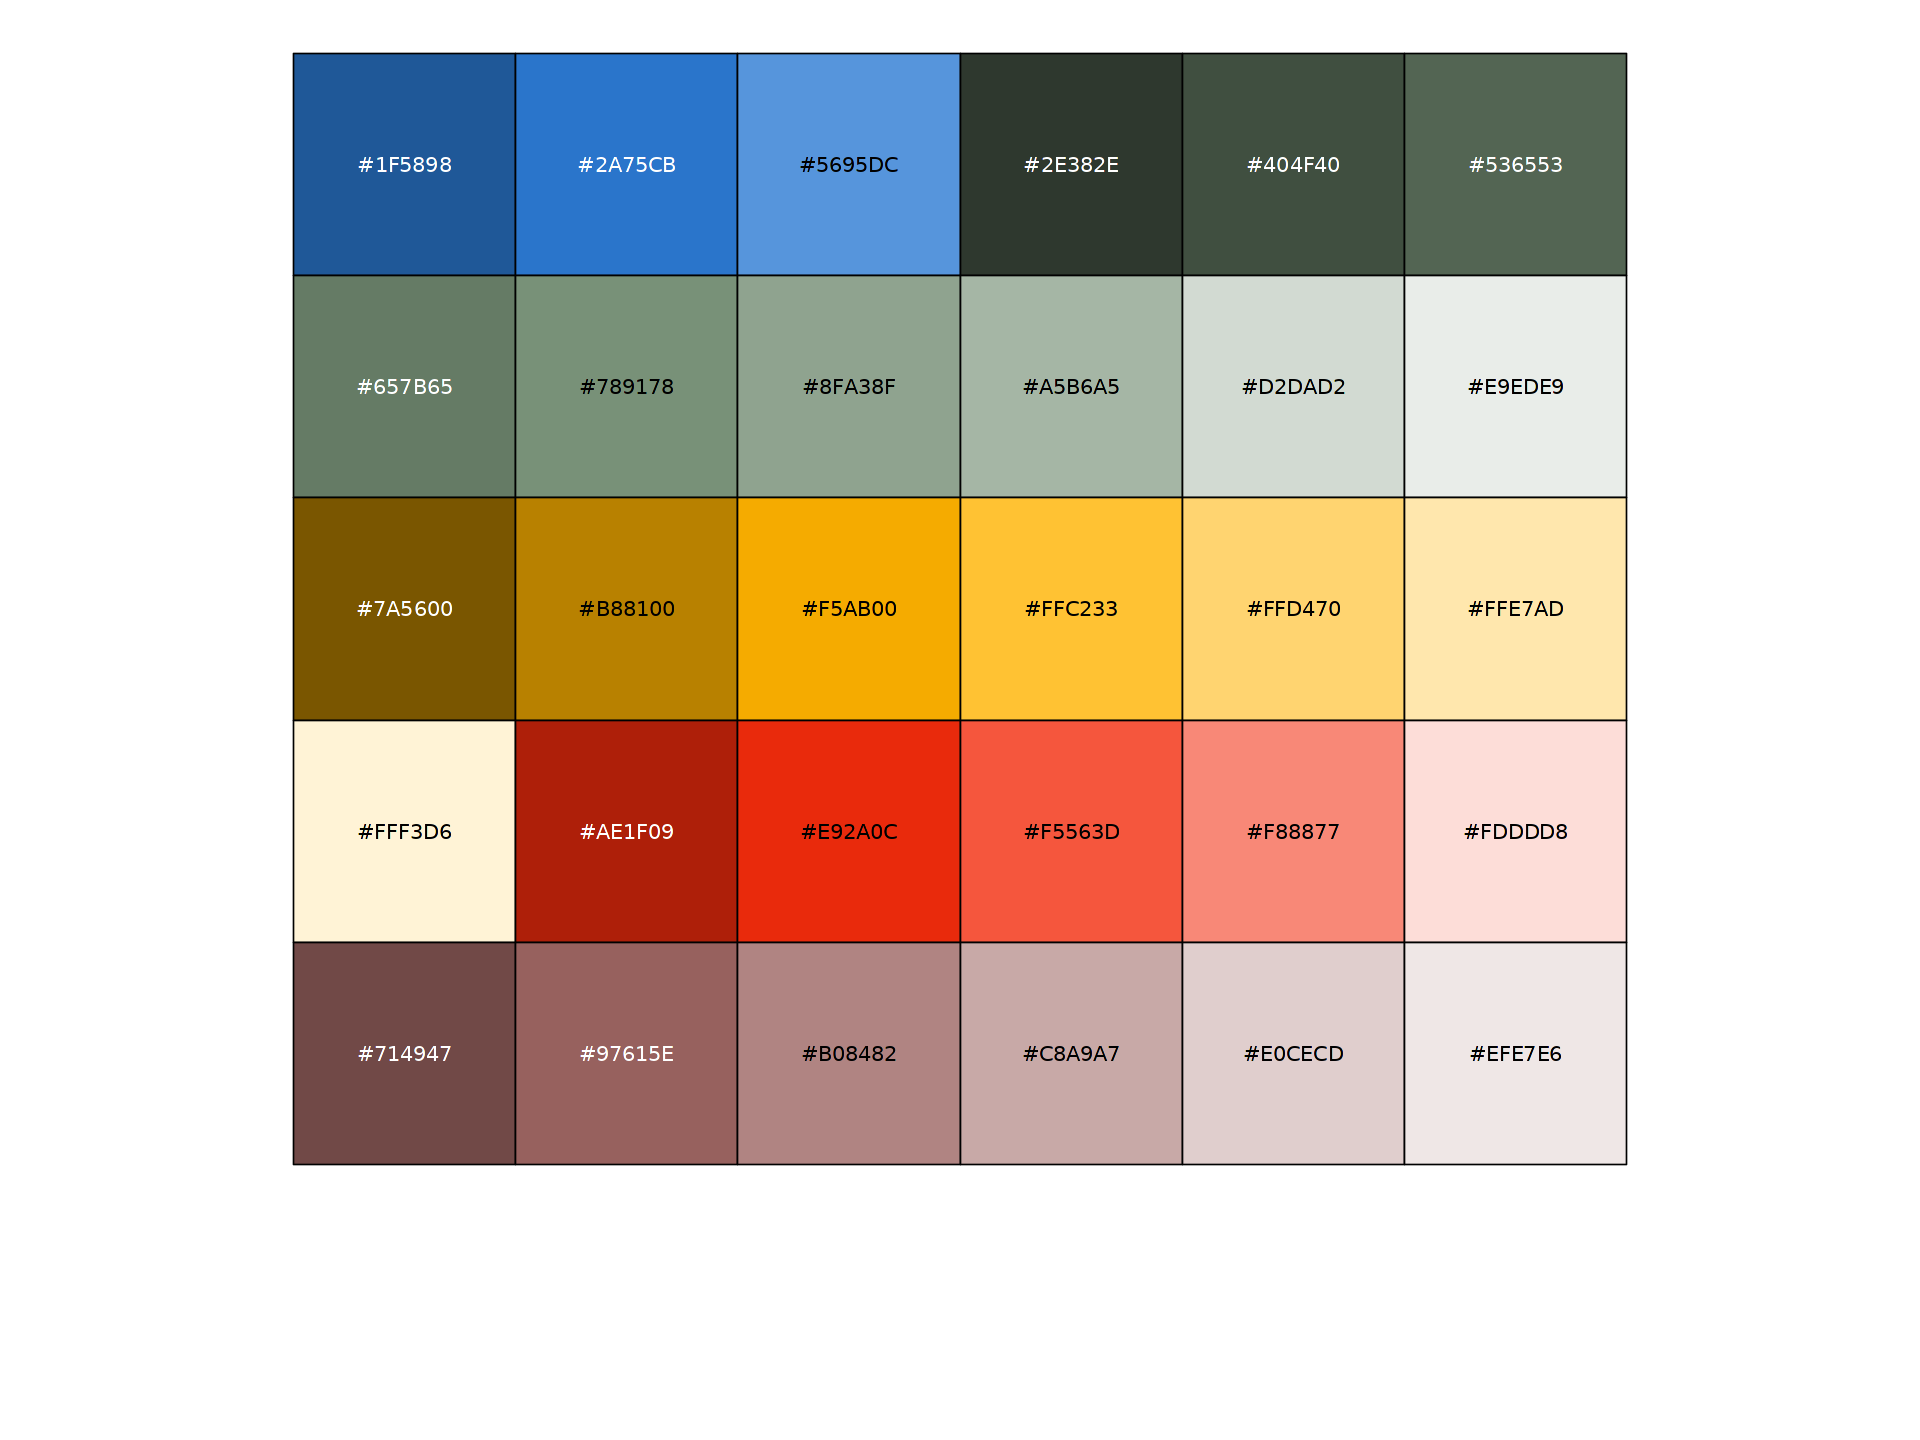

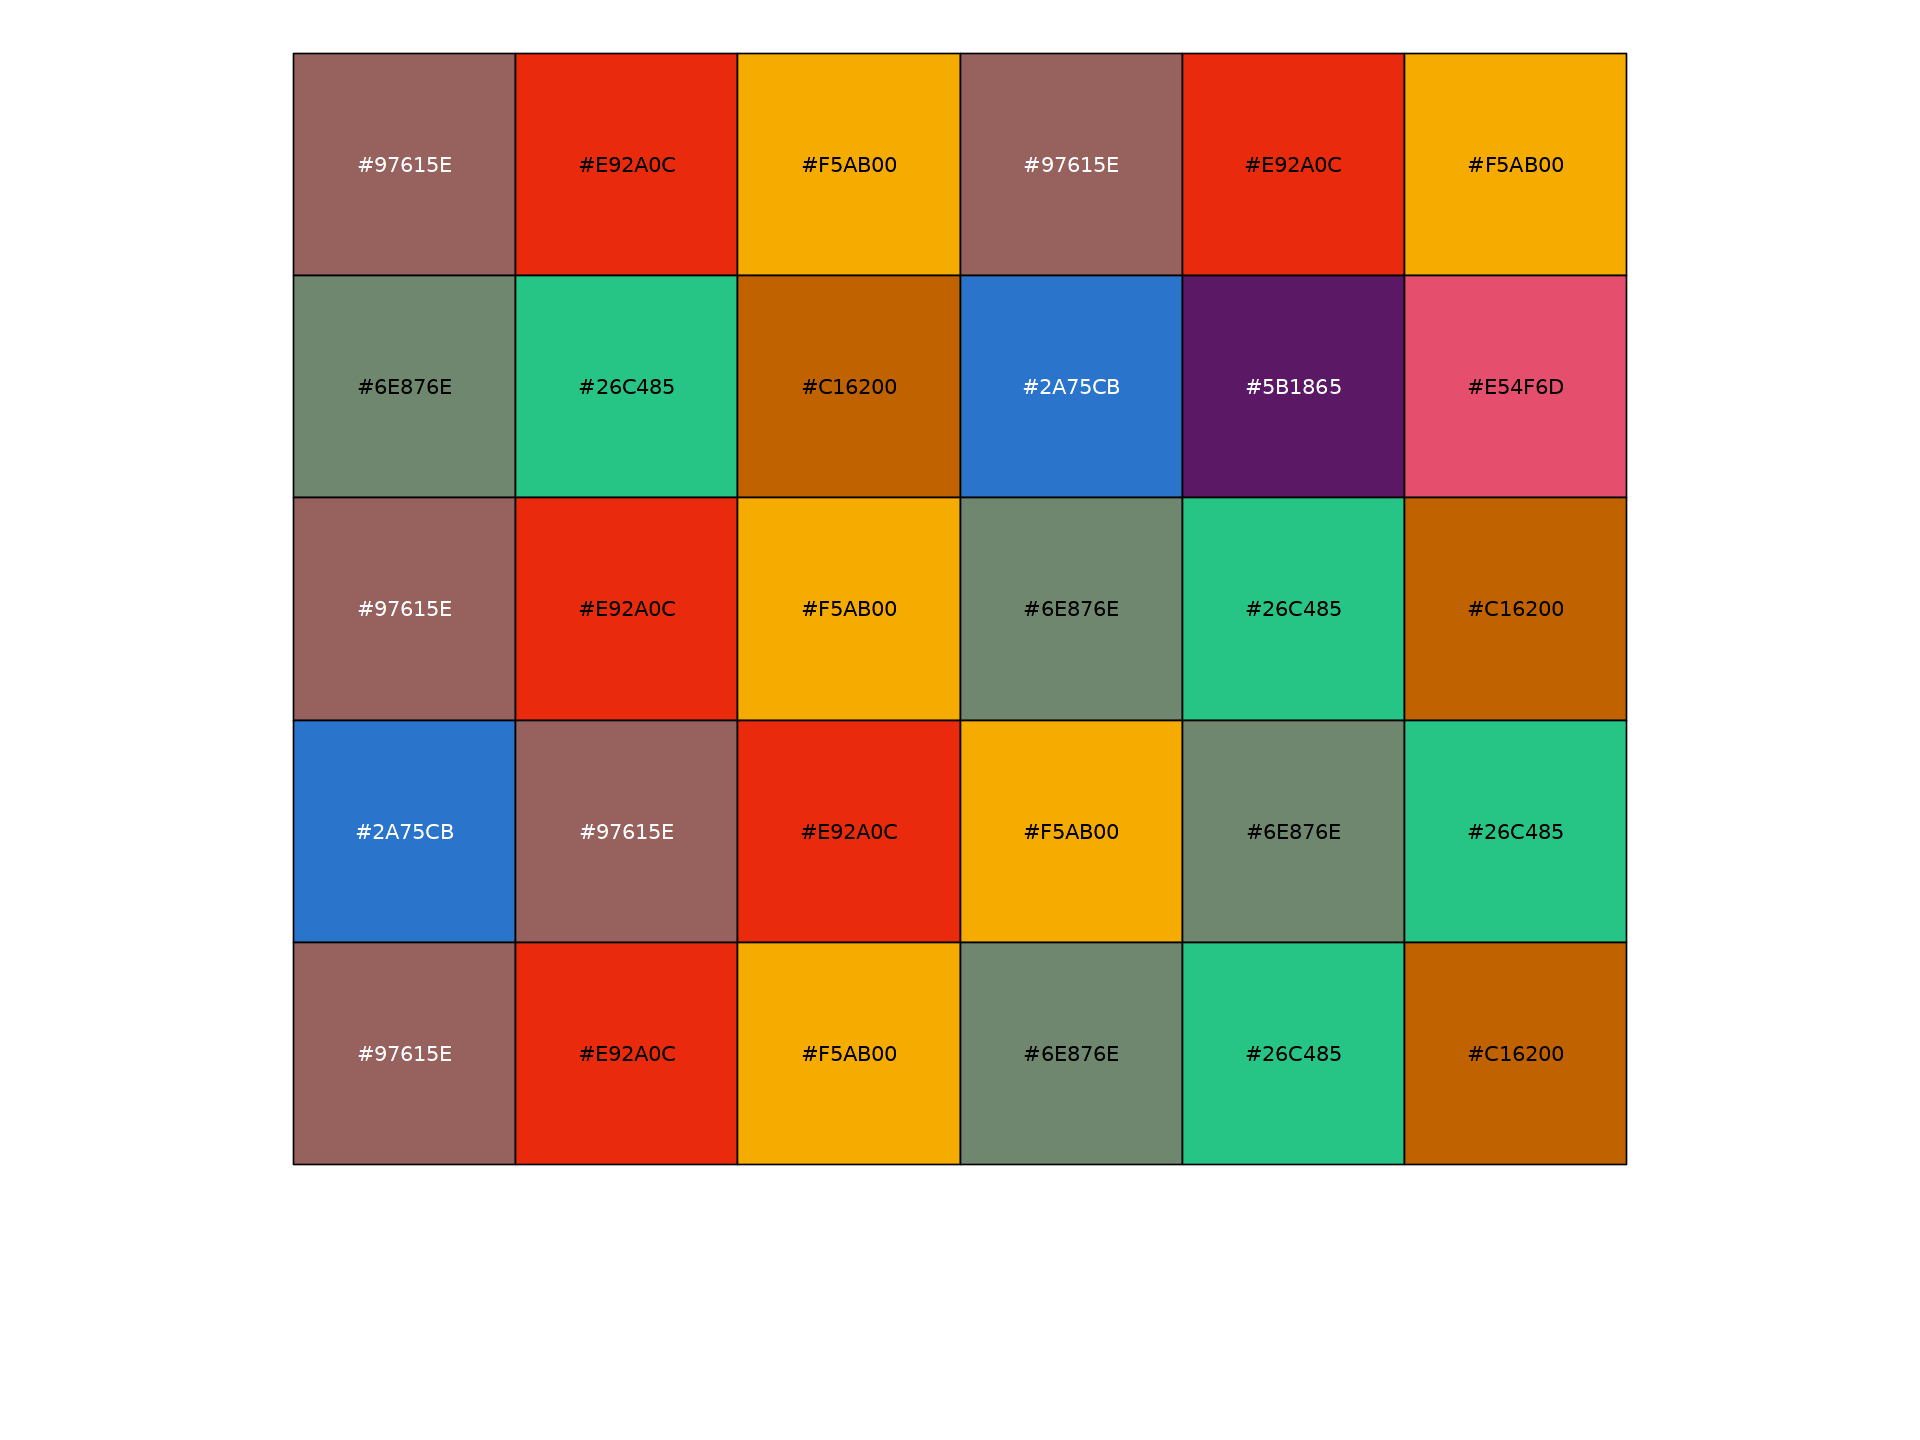

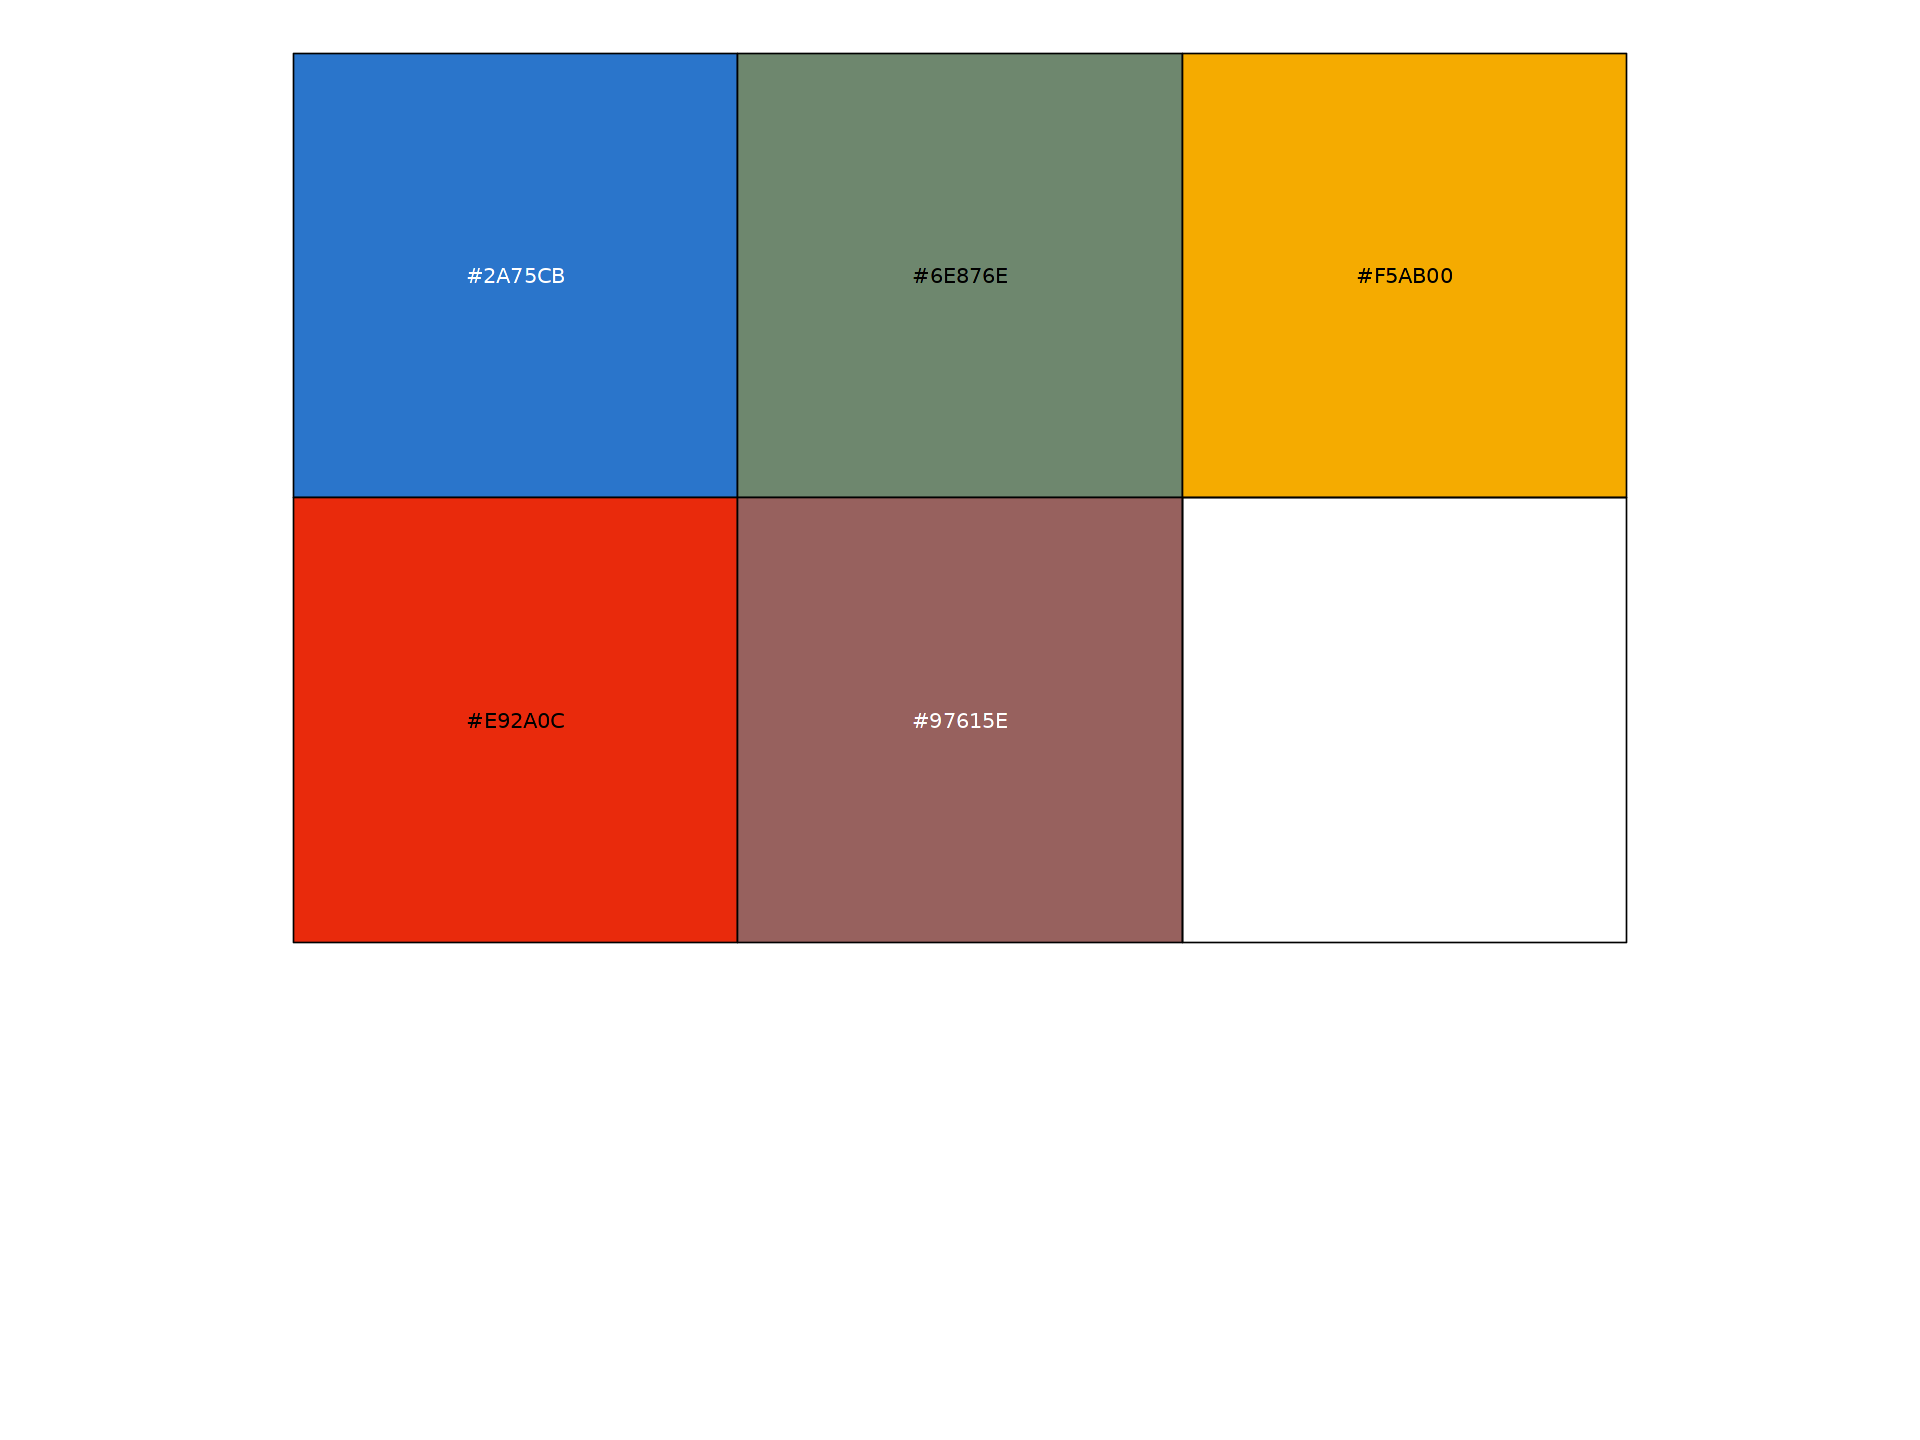

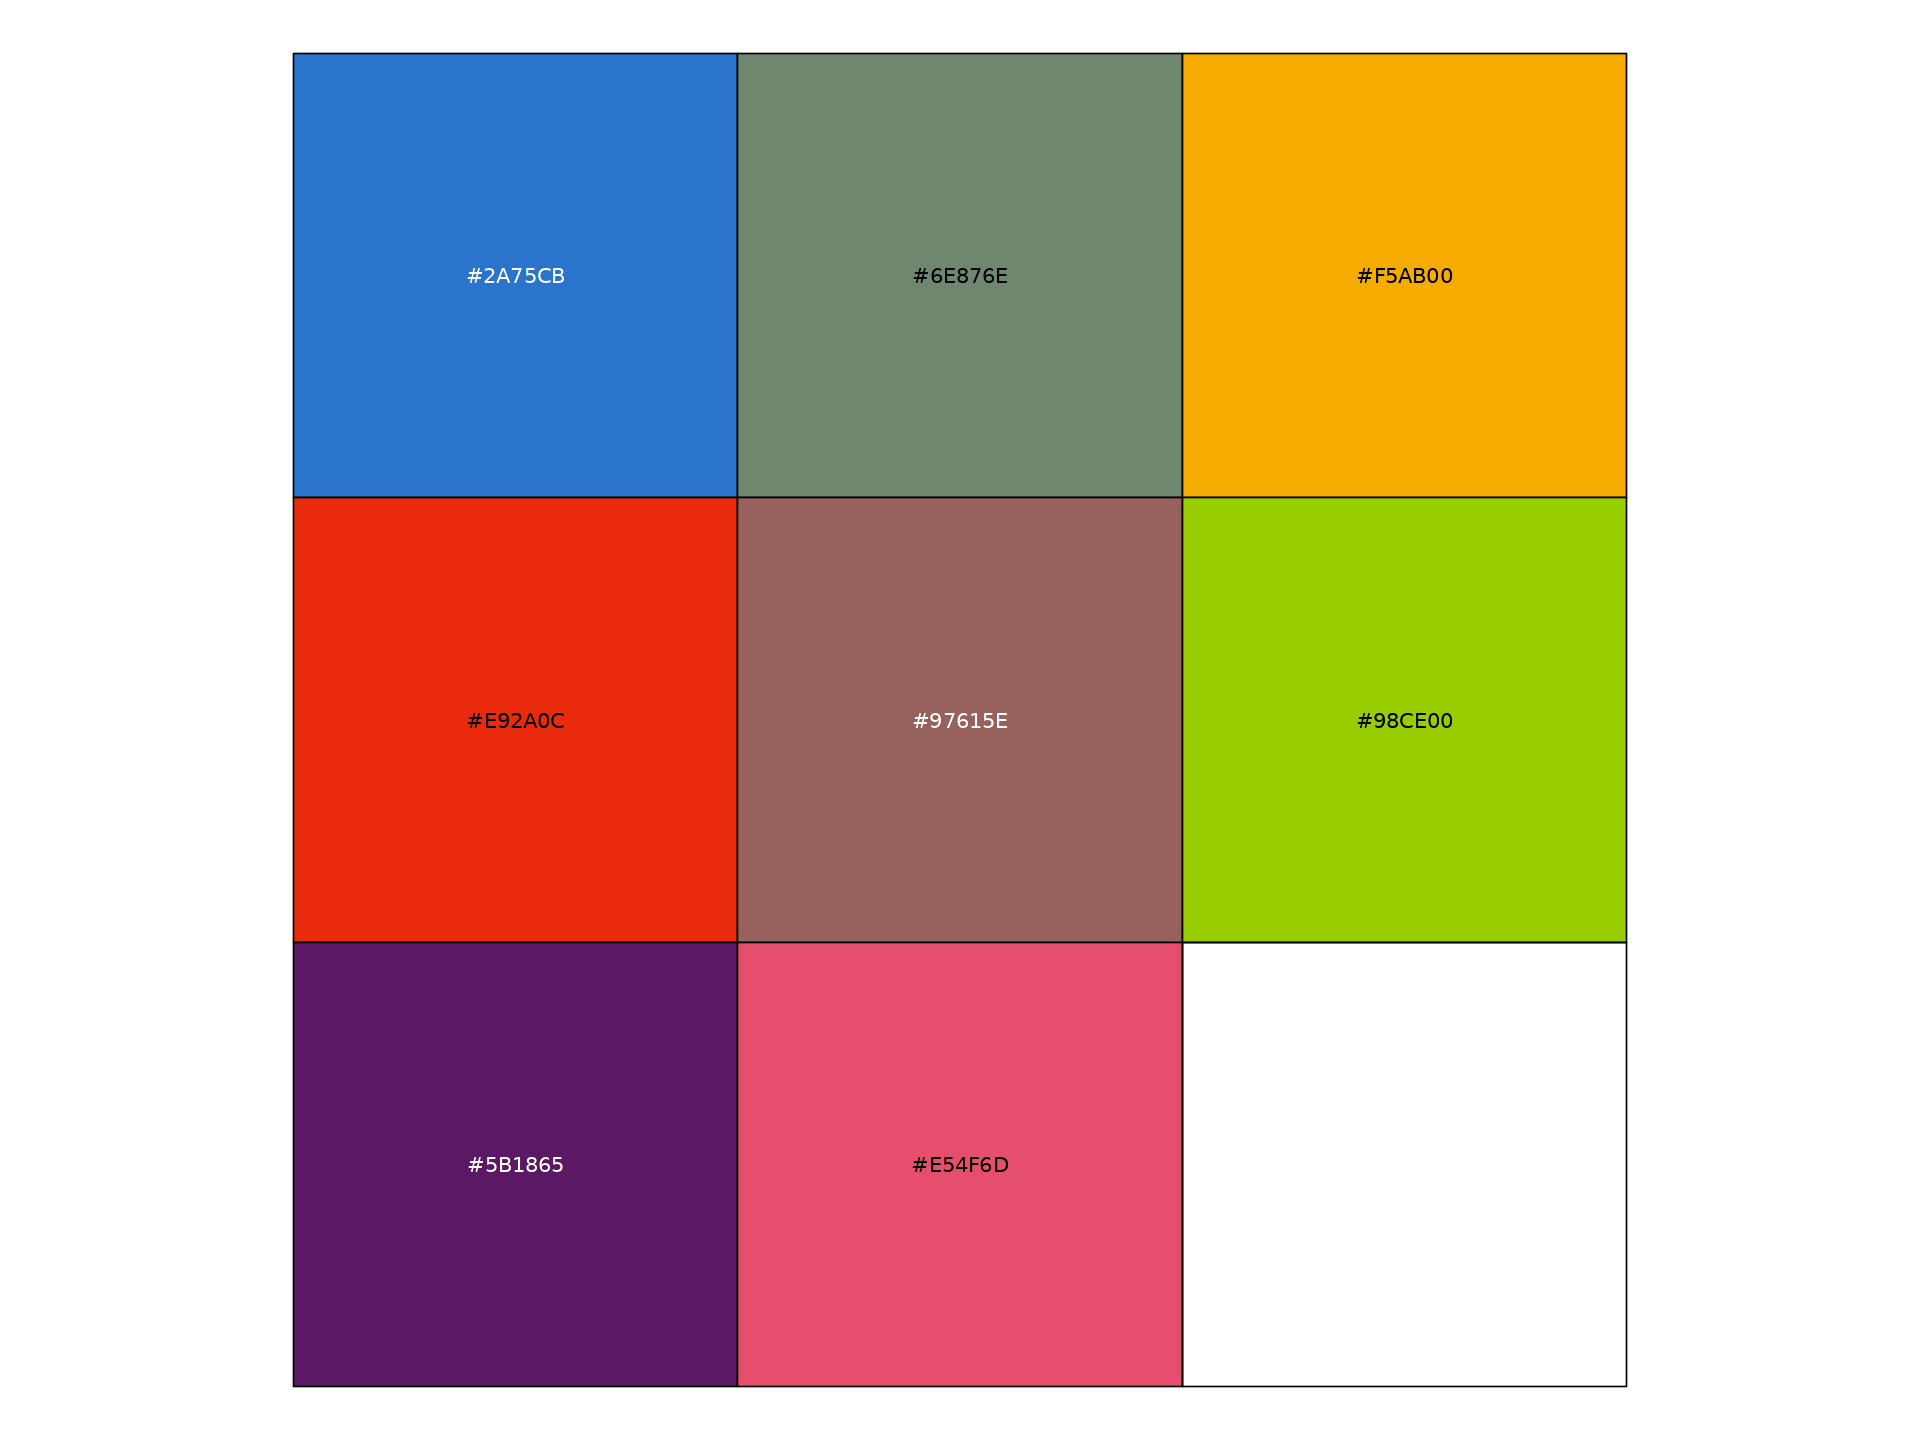

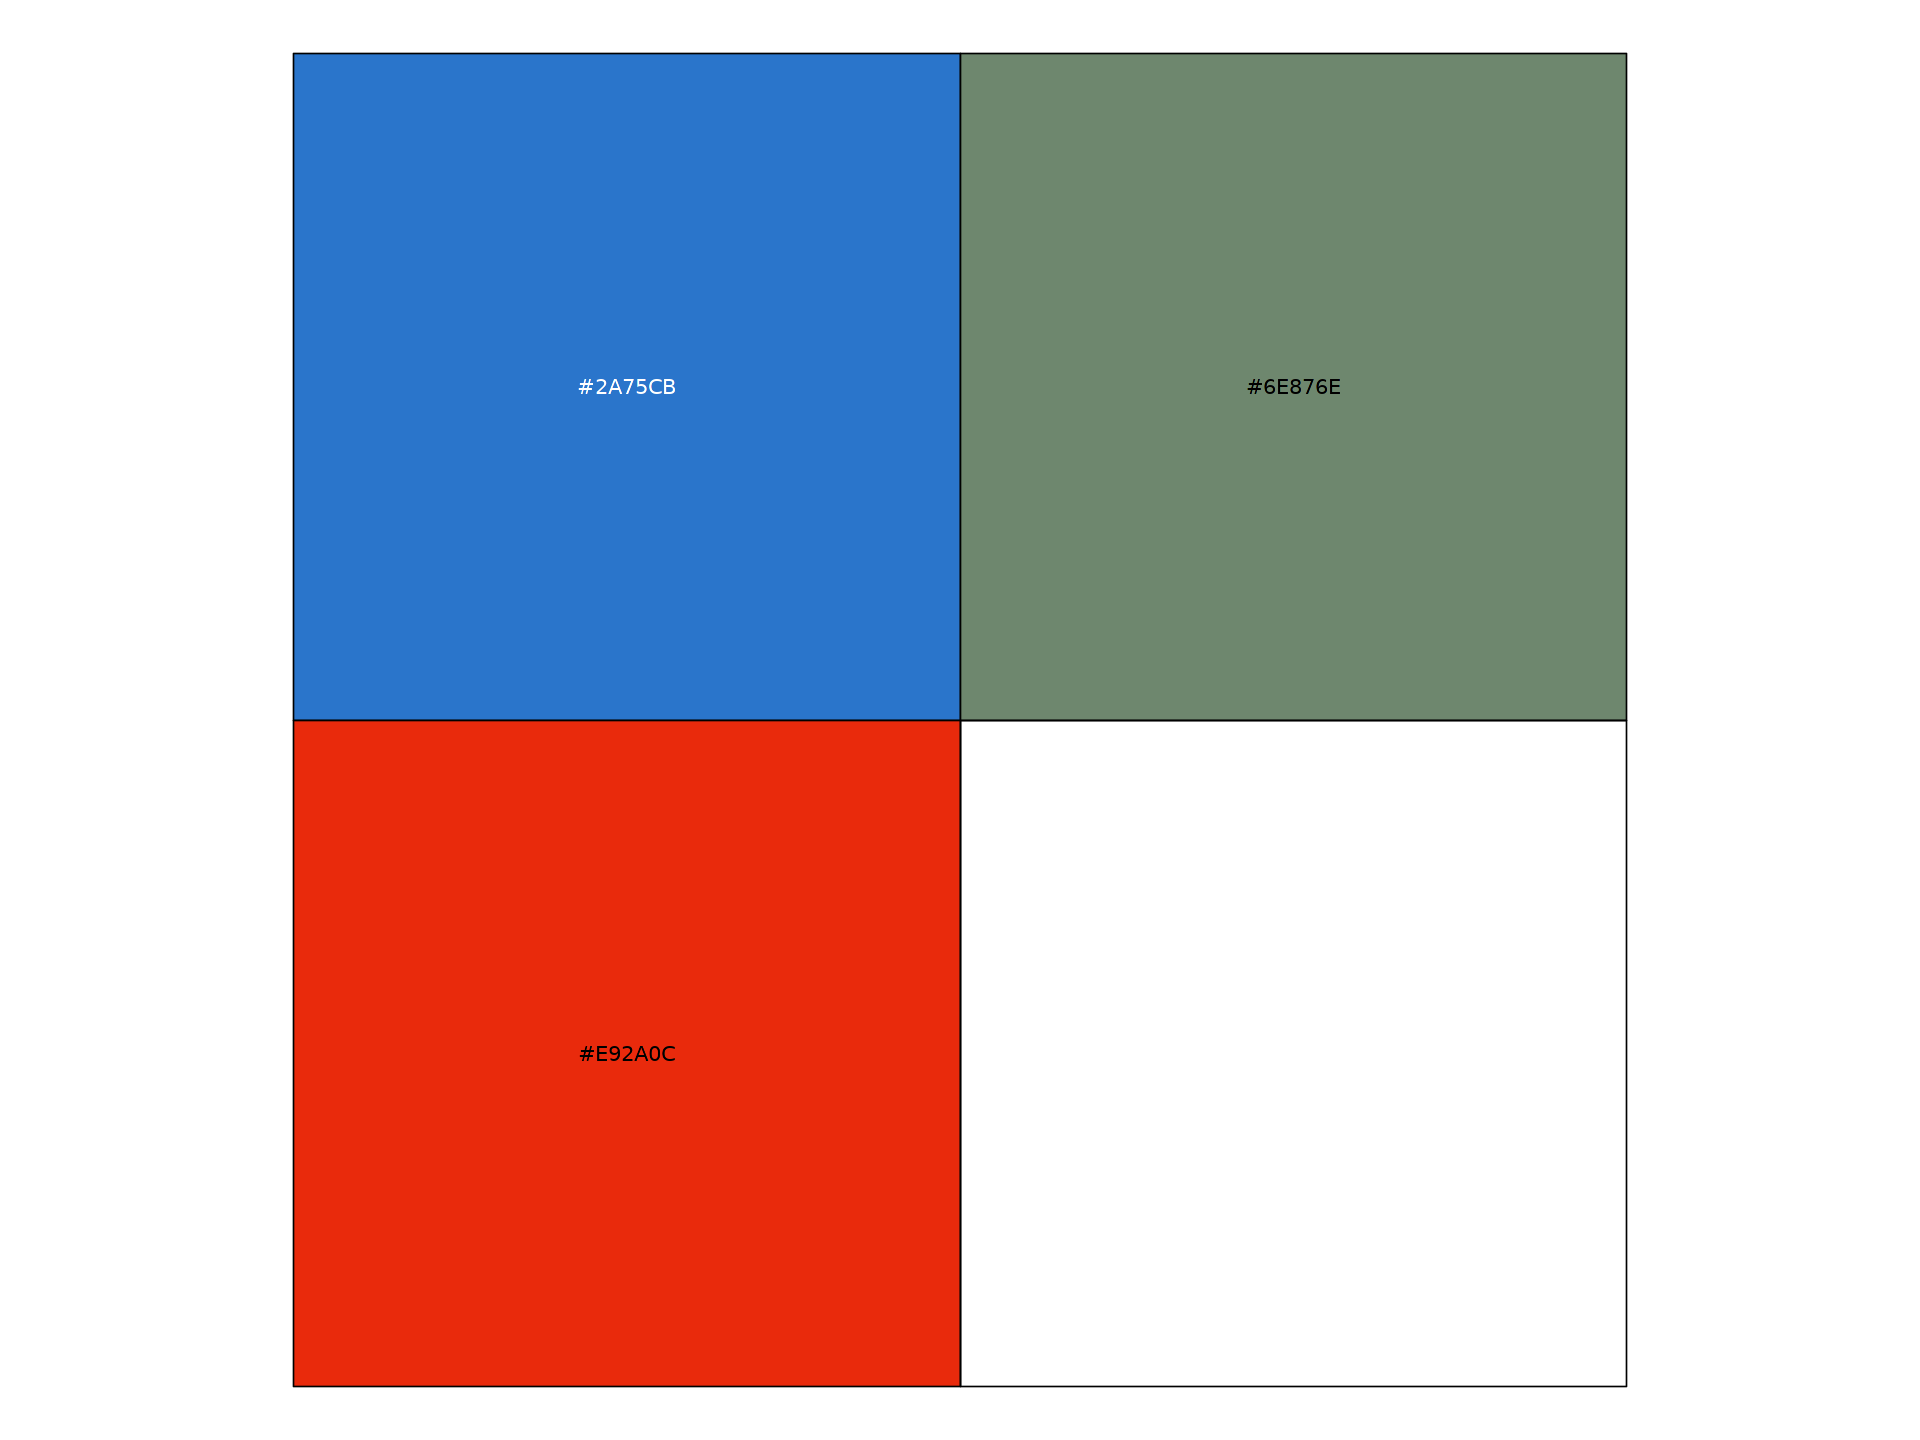

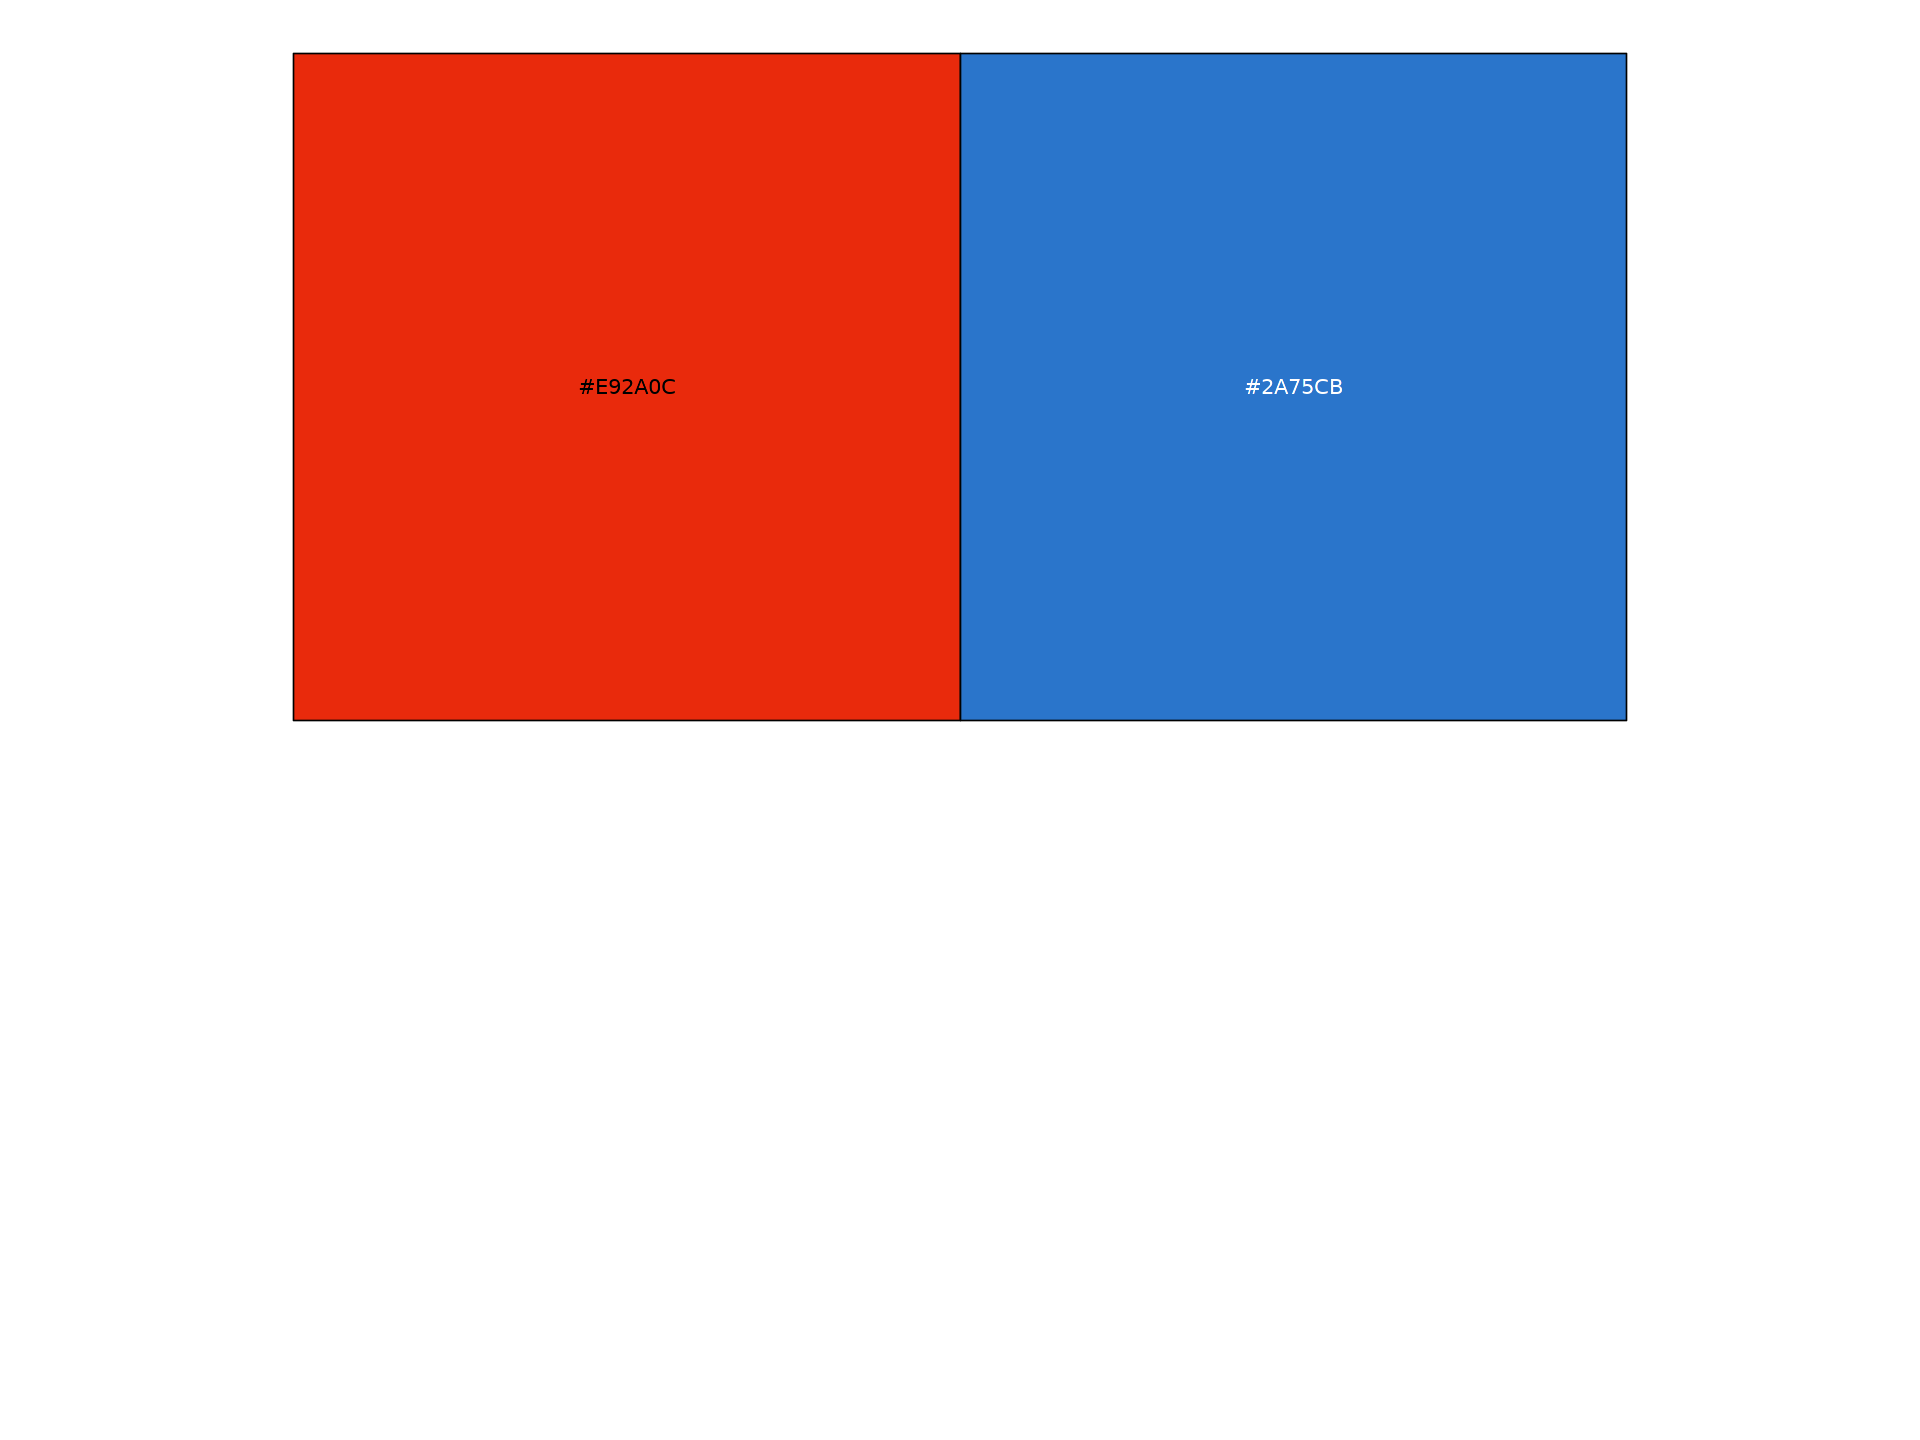

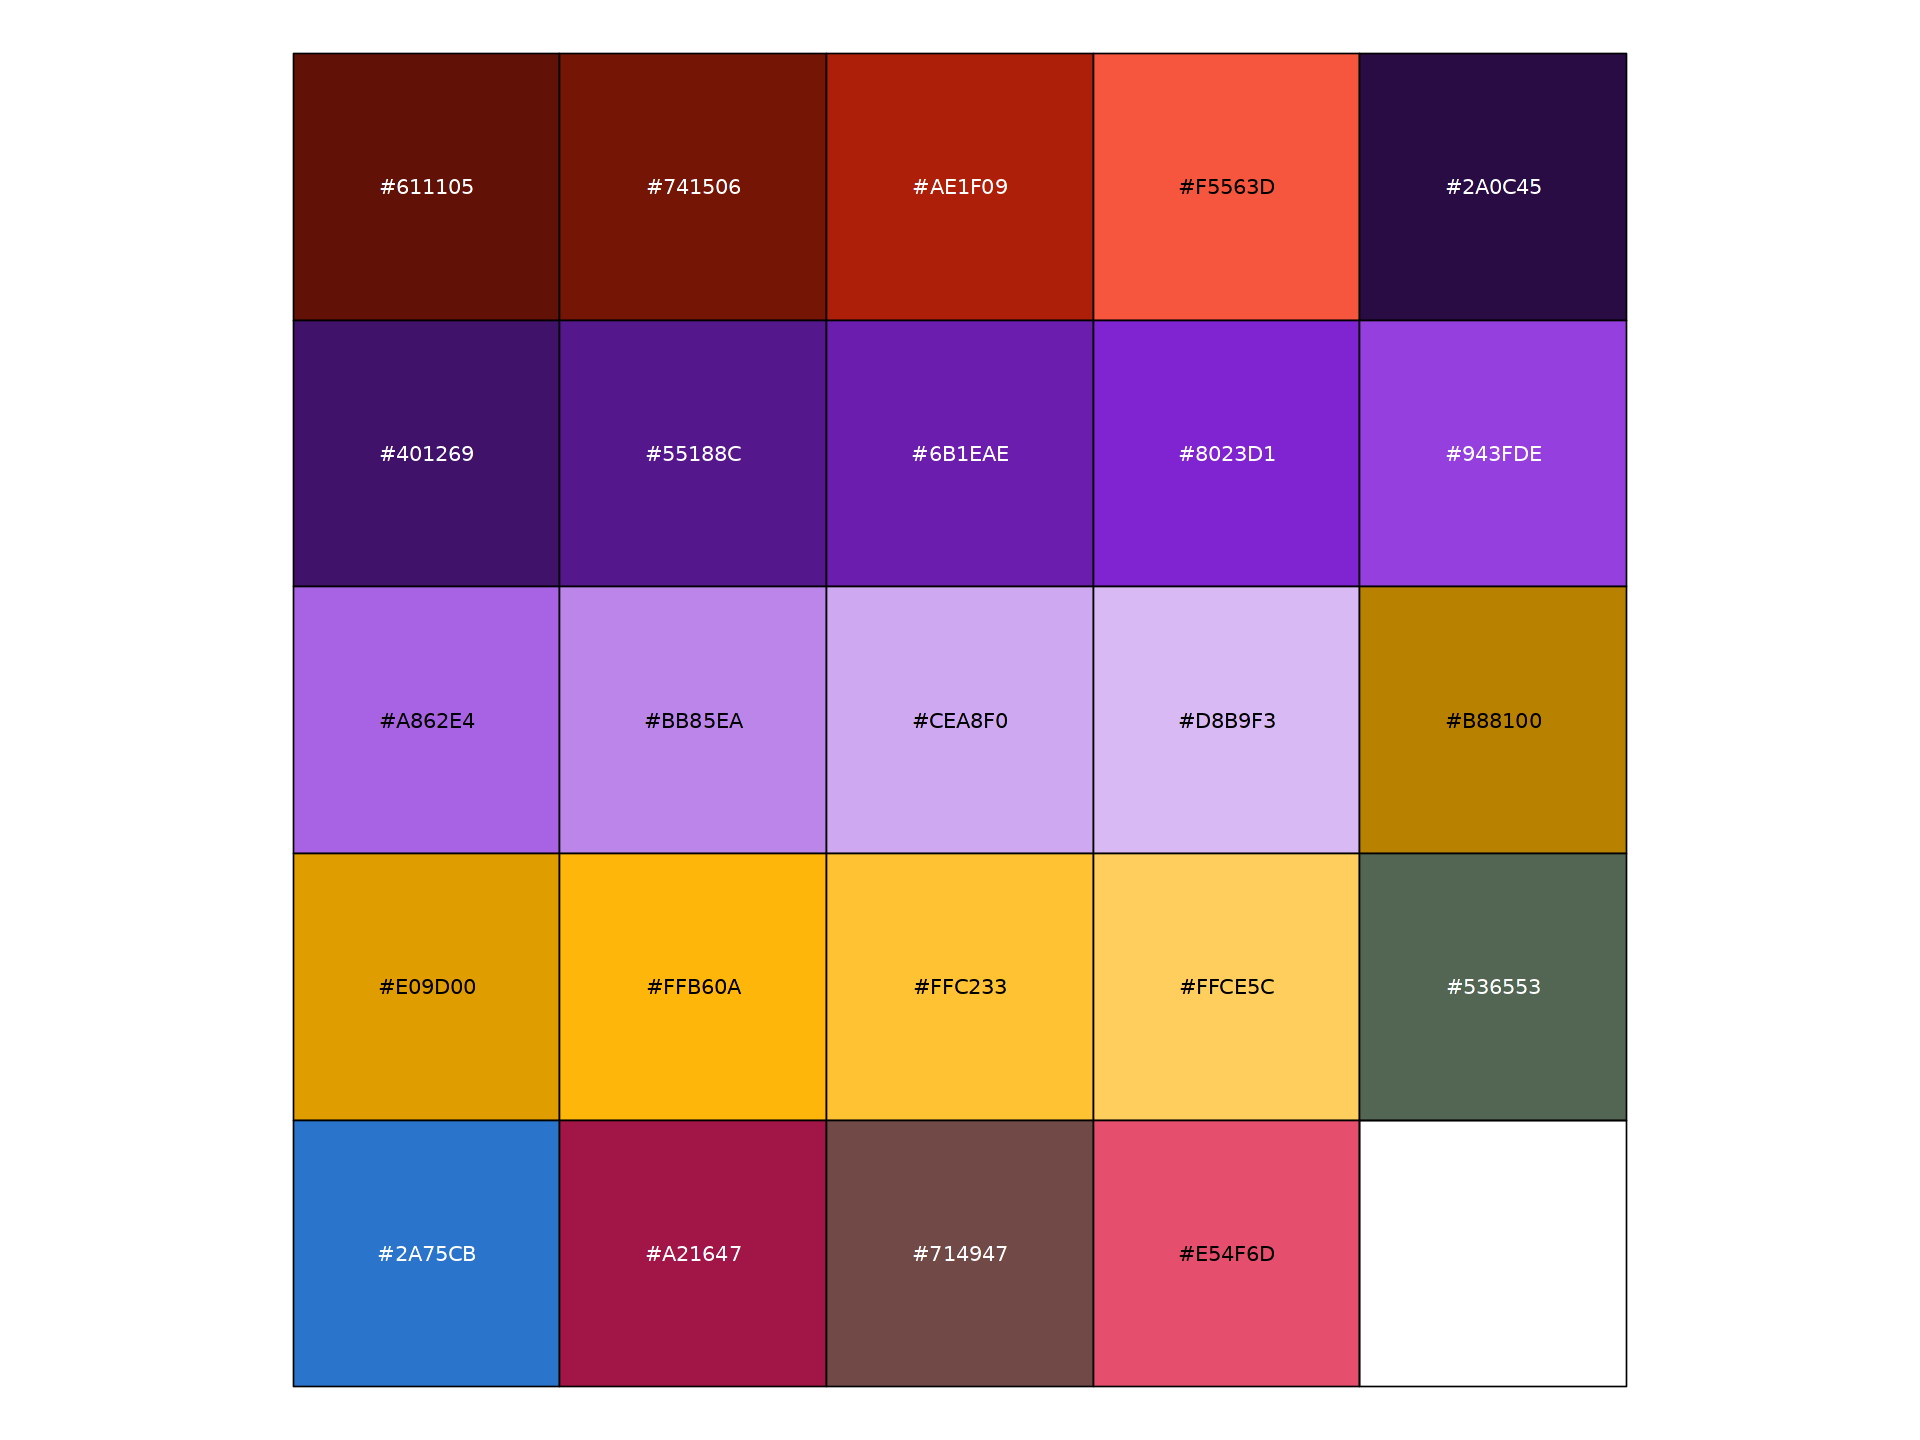

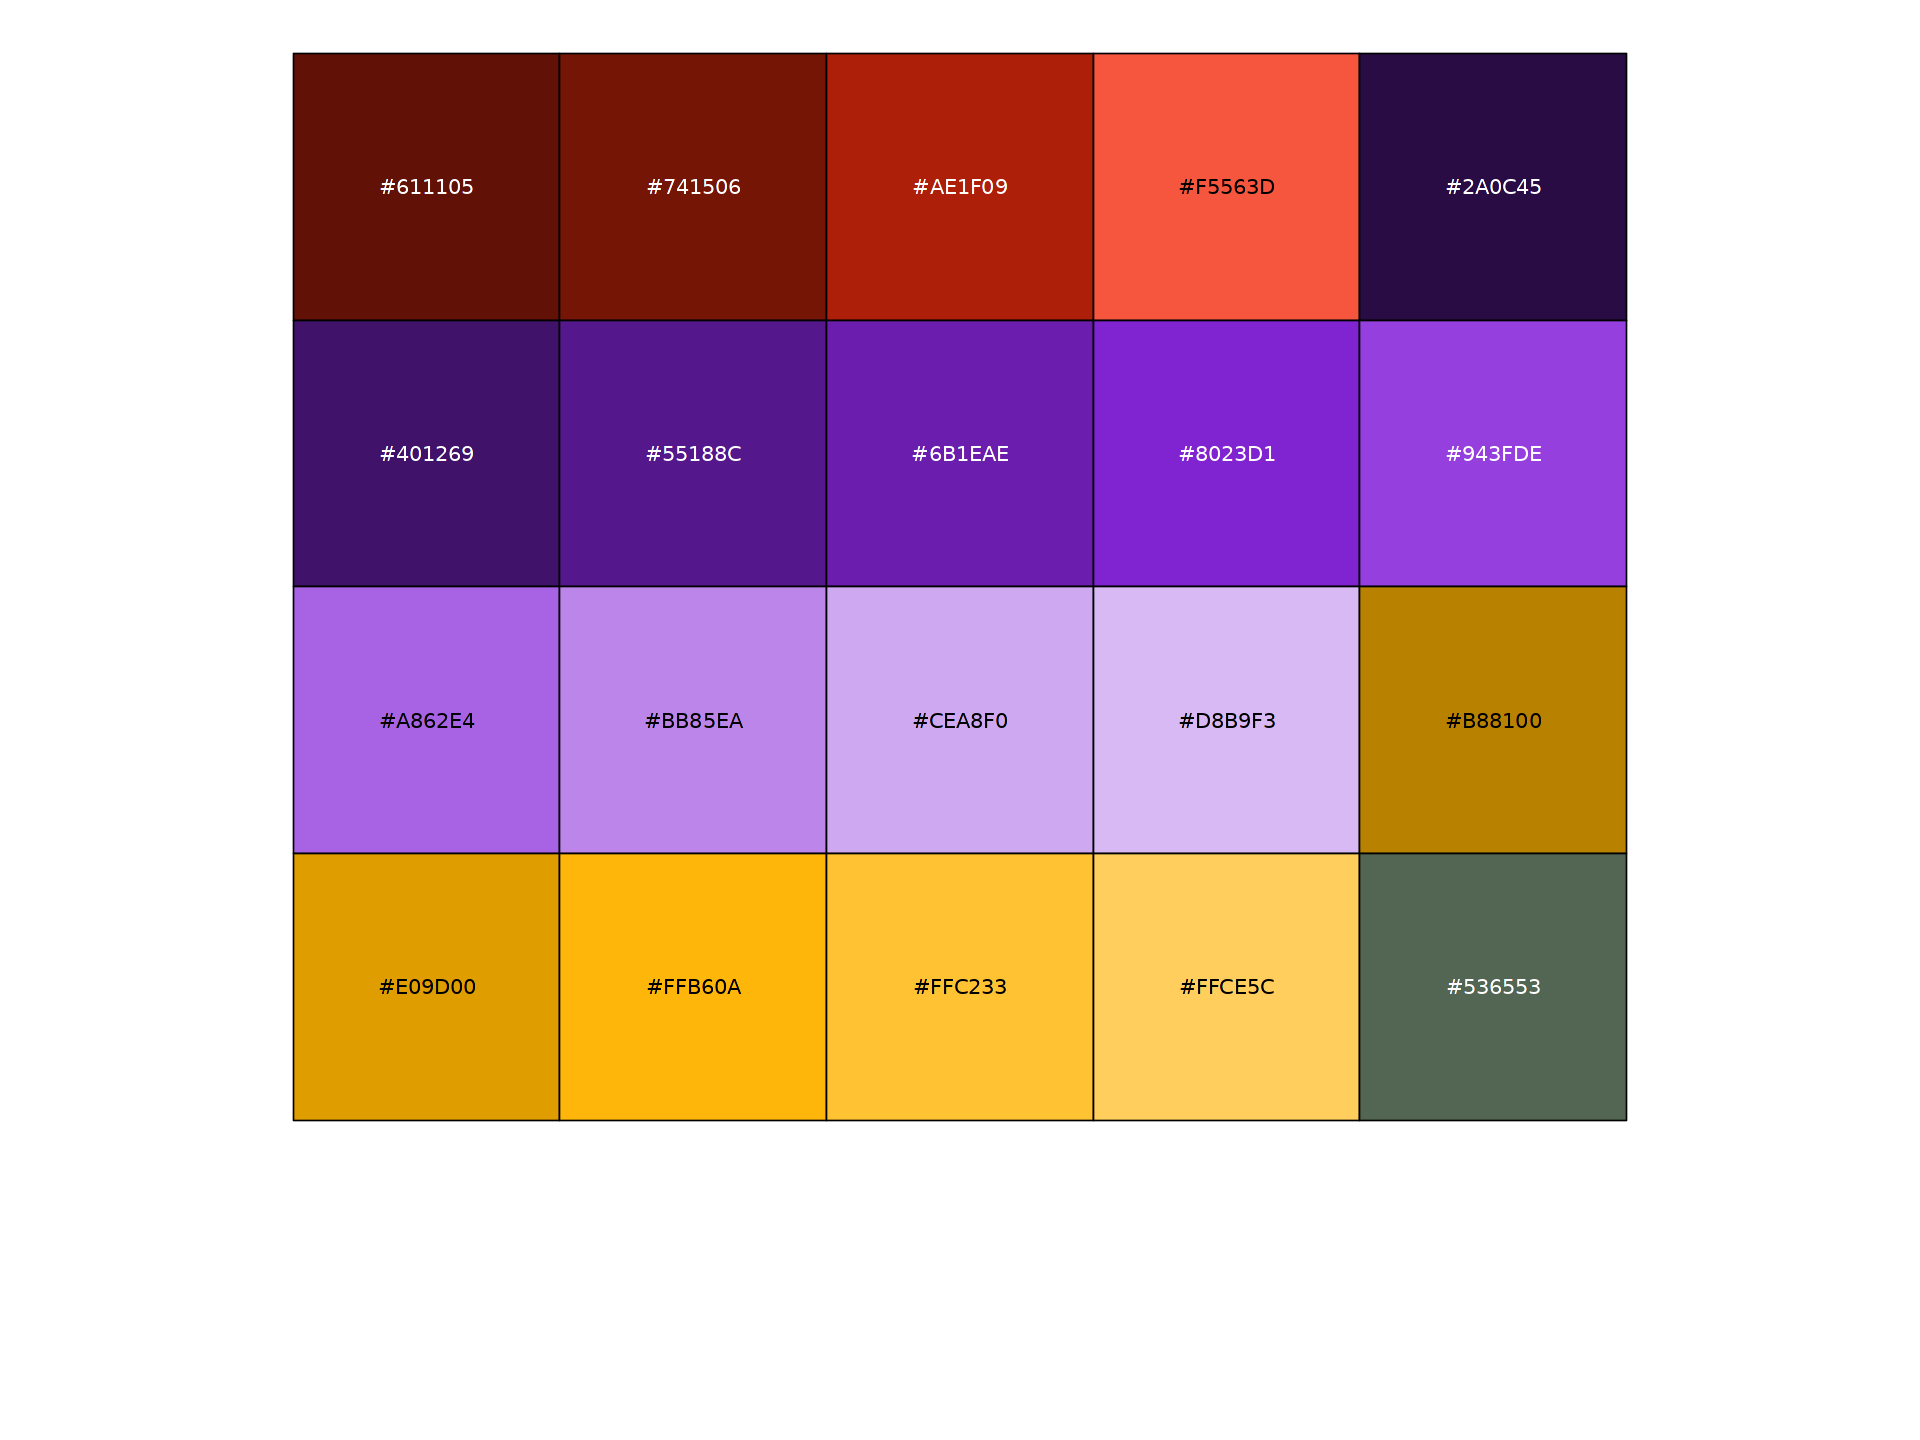

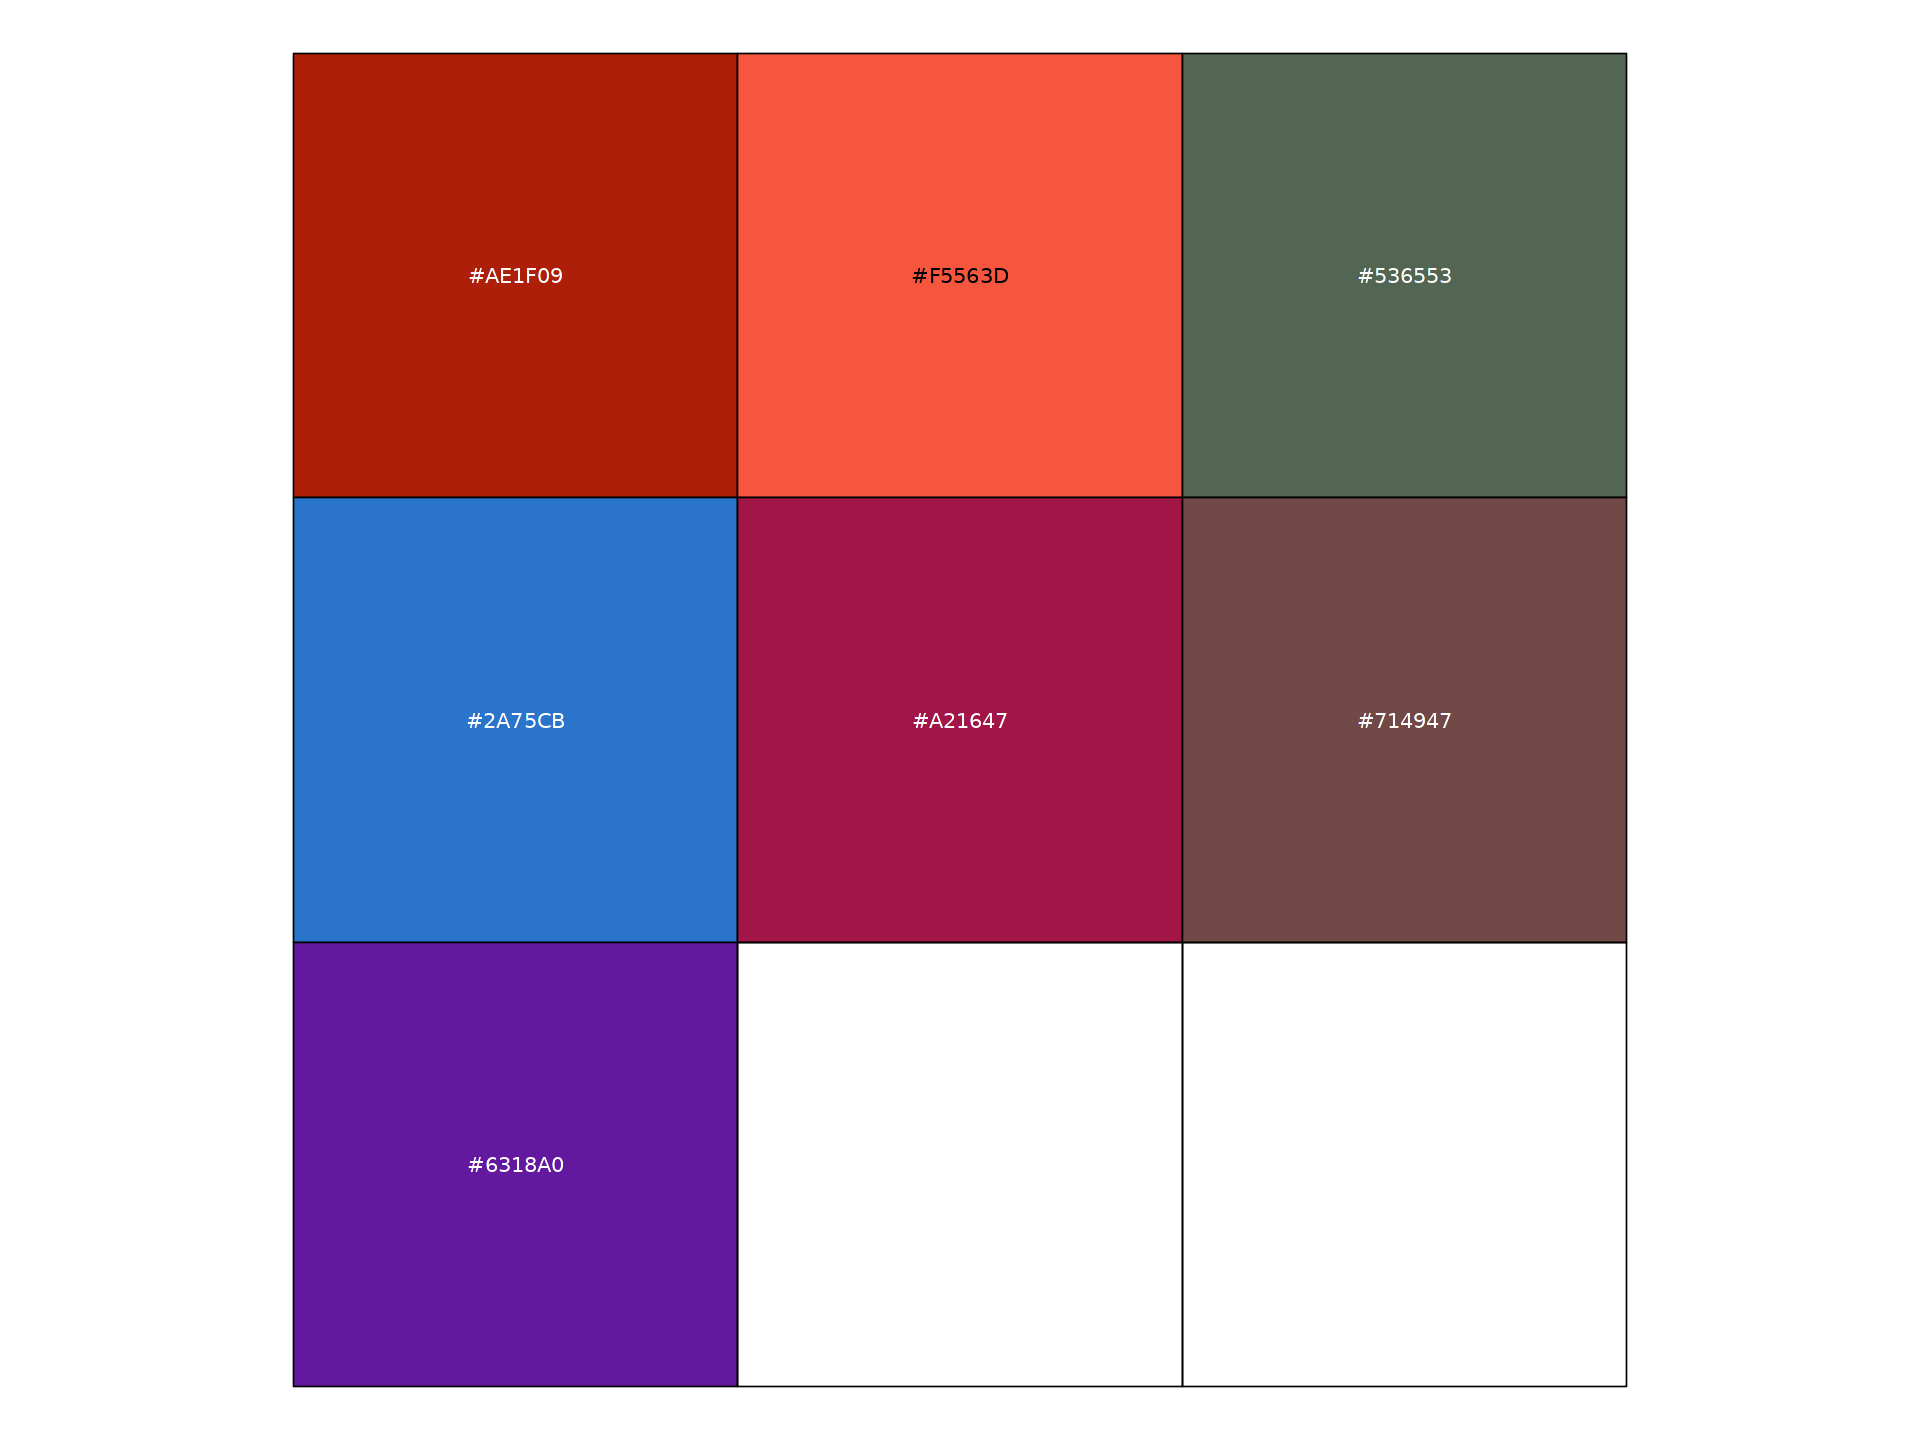

In [7]:
#Colors after removing LateCtrl1
orig.ident_colors <- c(
                       "#2E382E", "#404F40", "#536553", "#657B65", "#789178", "#8FA38F", "#A5B6A5", "#D2DAD2", "#E9EDE9", 
                       "#7A5600", "#B88100", "#F5AB00", "#FFC233", "#FFD470", "#FFE7AD", "#FFF3D6",
                       "#AE1F09", "#E92A0C", "#F5563D", "#F88877", "#FDDDD8",
                       "#714947", "#97615E", "#B08482", "#C8A9A7", "#E0CECD", "#EFE7E6")
names(orig.ident_colors) <- c(
                              "EarlyCtrl2", "EarlyCtrl3", "EarlyCtrl4", "EarlyCtrlMale5", "EarlyCtrlFemale5", "PeakCtrl2", "PeakCtrl3", "LateCtrl2", "LateCtrl3",
                              "Early1", "Early2", "EarlyFemale3", "EarlyMale3", "Early4", "EarlyMale5", "EarlyFemale5",
                              "Peak2", "Peak3", "PeakMale4", "PeakFemale4", "Peak5",
                              "Late1", "Late2", "Late3", "LateMale4", "LateFemale4", "Late5")
show_col(orig.ident_colors)
orig.ident_colors_contrast <- c(
                                "#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#26C485", "#C16200", "#2A75CB", "#5B1865", "#E54F6D",
                                "#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#26C485", "#C16200", "#2A75CB",
                                "#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#26C485",
                                "#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#26C485", "#C16200")
names(orig.ident_colors_contrast) <- c(
                              "EarlyCtrl2", "EarlyCtrl3", "EarlyCtrl4", "EarlyCtrlMale5", "EarlyCtrlFemale5", "PeakCtrl2", "PeakCtrl3", "LateCtrl2", "LateCtrl3",
                              "Early1", "Early2", "EarlyFemale3", "EarlyMale3", "Early4", "EarlyMale5", "EarlyFemale5",
                              "Peak2", "Peak3", "PeakMale4", "PeakFemale4", "Peak5",
                              "Late1", "Late2", "Late3", "LateMale4", "LateFemale4", "Late5")
show_col(orig.ident_colors_contrast)

orig.ident_merge_colors <- c("#6E876E", "#F5AB00", "#E92A0C", "#97615E")
names(orig.ident_merge_colors) <- c("Ctrl", "Early", "Peak", "Late")
show_col(orig.ident_merge_colors)

batch_colors <- c("#2A75CB", "#6E876E", "#F5AB00", "#E92A0C", "#97615E", "#98CE00", "#5B1865", "#E54F6D")
names(batch_colors) <- c("B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8")
show_col(batch_colors)

model_colors <- c("#6E876E", "#E92A0C")
names(model_colors) <- c("Ctrl", "EAE")
show_col(model_colors)

duo_colors <- c("#E92A0C", "#2A75CB")
show_col(duo_colors)

sex_colors <- duo_colors
names(sex_colors) <- c("F", "M")

immune_colors <- c("#A9DFBF", "#FF000080")
names(immune_colors) <- c("NonImmune", "Immune")
#show_col(immune_colors)

immuneAll_colors <- c("lightgrey", "blue", "orange", "red")
names(immuneAll_colors) <- c("None", "RNA", "GenePromAcc", "Both")
#show_col(immuneAll_colors)

doublets_colors <- c("#A9DFBF", "#FF000080")
names(doublets_colors) <- c("Singlet", "Doublet")
#show_col(doublets_colors)

debris_colors <- duo_colors
names(debris_colors) <- c("Percoll", "Debris")

date_tissue_coll_colors <- scales::viridis_pal()(17)
names(date_tissue_coll_colors) <- c('2021_04_30','2021_05_03','2021_05_31','2021_09_30','2021_10_06','2021_11_26','2022_03_09','2022_03_10','2022_08_03','2022_08_24','2023_01_23','2023_02_15','2023_03_22','2023_06_15','2023_06_14','2022_05_12','2022_05_16')
#show_col(date_tissue_coll_colors)

date_exp_colors <- scales::viridis_pal()(7)
names(date_exp_colors) <- c('2021_04_20','2021_09_22','2021_11_17','2022_01_31','2022_07_18','2023_01_09','2023_06_05')
#show_col(date_exp_colors)

EAE_score_mean_colors <- scales::viridis_pal()(7)
names(EAE_score_mean_colors) <- c(0,0.5,2,2.25,2.33,2.5,3)
#show_col(EAE_score_mean_colors)

subcellType_colors <- c("#611105", "#741506", "#AE1F09", "#F5563D", "#2A0C45","#401269","#55188C","#6B1EAE","#8023D1","#943FDE","#A862E4","#BB85EA","#CEA8F0","#D8B9F3","#B88100","#E09D00","#FFB60A","#FFC233","#FFCE5C","#536553","#2A75CB","#A21647","#714947","#E54F6D")
names(subcellType_colors) <- c("OPC-α", "OPC-β", "OPC-γ", "COP", "MOL56-α","MOL56-β","MOL56-γ","MOL56-δ","MOL56-ε","MOL56-ζ","MOL56-η","MOL56-θ","MOL56-ι","MOL56-κ","MOL2-α","MOL2-β","MOL2-γ","MOL2-δ","MOL2-ε","MOL1","Astro","Epen","Micro","Neuron")
show_col(subcellType_colors)

cellType_OL_colors <- c("#611105", "#741506", "#AE1F09", "#F5563D", "#2A0C45","#401269","#55188C","#6B1EAE","#8023D1","#943FDE","#A862E4","#BB85EA","#CEA8F0","#D8B9F3","#B88100","#E09D00","#FFB60A","#FFC233","#FFCE5C","#536553")
names(cellType_OL_colors) <- c("OPC-α", "OPC-β", "OPC-γ", "COP", "MOL56-α","MOL56-β","MOL56-γ","MOL56-δ","MOL56-ε","MOL56-ζ","MOL56-η","MOL56-θ","MOL56-ι","MOL56-κ","MOL2-α","MOL2-β","MOL2-γ","MOL2-δ","MOL2-ε","MOL1")
show_col(cellType_OL_colors)

cellType_colors <- c("#AE1F09", "#F5563D", "#536553", "#2A75CB", "#A21647", "#714947", "#6318A0")
names(cellType_colors) <- c("OPC", "COP", "MOL", "Astro", "Epen", "Micro", "Neuron")
show_col(cellType_colors)

cellType_OL_merge_colors <- c("#AE1F09","#F5563D","#4B157A","#8F6400", "#6E876E")
names(cellType_OL_merge_colors) <- c("OPC", "COP", "MOL56", "MOL2", "MOL1")
show_col(cellType_OL_merge_colors)

In [8]:
#Set up ATAC annotation
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79, verbose =FALSE)
ucsc.levels <- str_replace(string=paste("chr",seqlevels(annotations),sep=""), pattern="chrMT", replacement="chrM")
seqlevels(annotations) <- ucsc.levels
genome(annotations) <- "mm10"

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

## 2. Loading datasets

In [9]:
MORNAATACC <- readRDS(paste0(OS_path_outputs, "MORNAATACC_ReAnnot.rds"))

## 3. Plots

In [10]:
MORNAATACC

An object of class Seurat 
256708 features across 131881 samples within 3 assays 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: peaks, GenePromAcc
 5 dimensional reductions calculated: pca, umap_RNA, lsi, umap_peaks, umap_BiMod

In [11]:
table(MORNAATACC$orig.ident)


          Naive1           Naive2           Naive3       EarlyCtrl2 
               0                0                0              468 
      EarlyCtrl3       EarlyCtrl4   EarlyCtrlMale5 EarlyCtrlFemale5 
            3593             7039             8227             8368 
       PeakCtrl2        PeakCtrl3        LateCtrl2        LateCtrl3 
            3211             2115             8498             7411 
          Early1           Early2     EarlyFemale3       EarlyMale3 
            4206                0             3423             3728 
          Early4       EarlyMale5     EarlyFemale5            Peak2 
            1342            10583            11087             1762 
           Peak3        PeakMale4      PeakFemale4            Peak5 
            3725             3400             3838             4089 
           Late1            Late2            Late3        LateMale4 
            4515             1682             4310             4973 
     LateFemale4            Late5

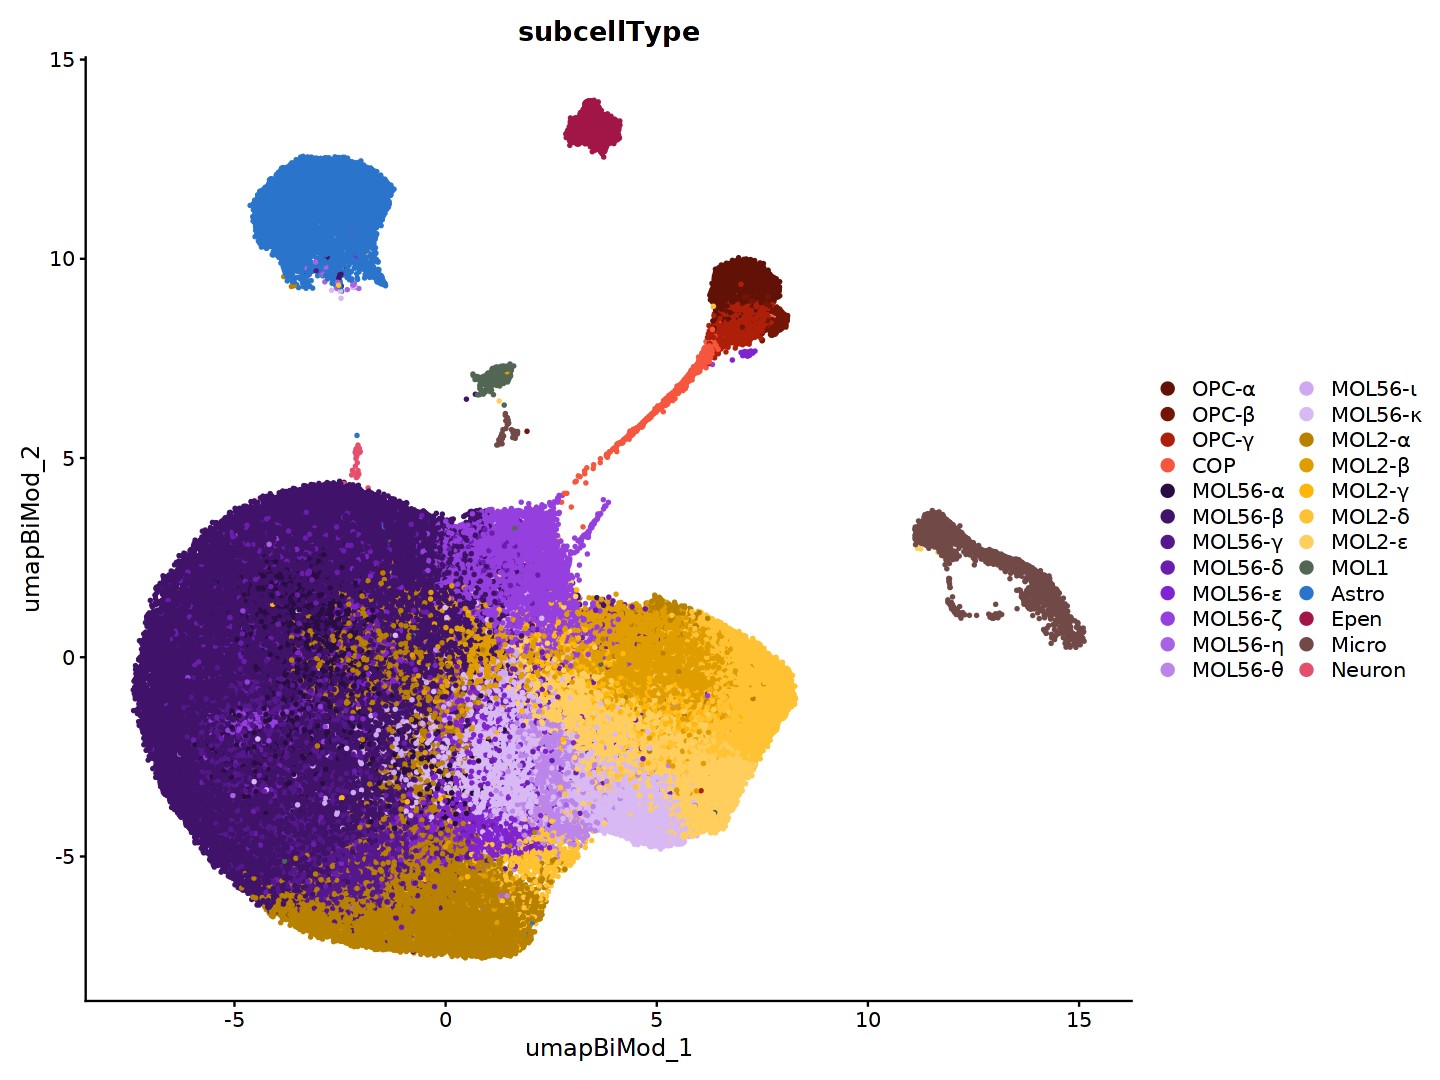

In [12]:
options(repr.plot.width=12, repr.plot.height=9)
DimPlot(MORNAATACC, group.by = "subcellType", reduction = "umap_BiMod", shuffle=TRUE, seed=seed, cols=subcellType_colors, pt.size=0.5, label = FALSE, raster=FALSE)

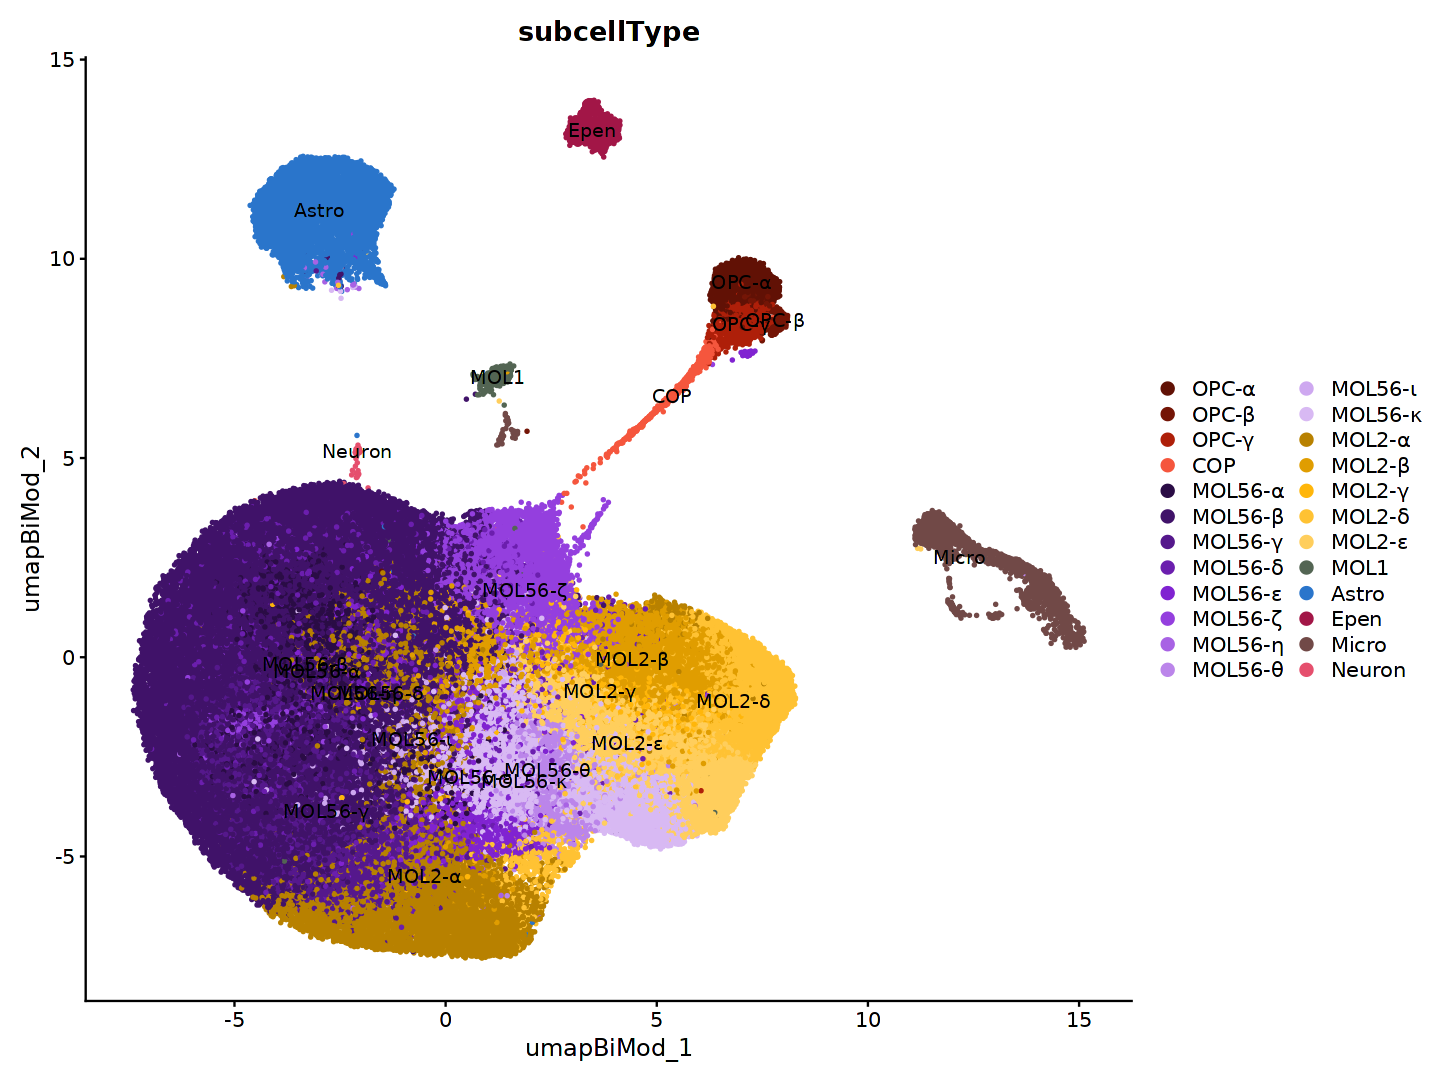

In [13]:
options(repr.plot.width=12, repr.plot.height=9)
DimPlot(MORNAATACC, group.by = "subcellType", reduction = "umap_BiMod", shuffle=TRUE, seed=seed, cols=subcellType_colors, pt.size=0.5, label = TRUE, raster=FALSE)

## 4. Create bigwig file

From https://github.com/GreenleafLab/ArchR/blob/21099d6ed966f6088b7b49ebbb9cca07486e8875/R/GroupExport.R#L356-L363

In [15]:
MORNAATACC$bw_group <- paste0(MORNAATACC$cellType,"_",MORNAATACC$orig.ident_merge)

In [16]:
order_bw <- c("OPC_Ctrl", "OPC_Early", "OPC_Peak", "OPC_Late", "COP_Ctrl", "COP_Early", "COP_Peak", "COP_Late", "MOL56_Ctrl", "MOL56_Early", "MOL56_Peak", "MOL56_Late", "MOL2_Ctrl", "MOL2_Early", "MOL2_Peak", "MOL2_Late", "MOL1_Ctrl", "MOL1_Early", "MOL1_Peak", "MOL1_Late", "Astro_Ctrl", "Astro_Early", "Astro_Peak", "Astro_Late", "Micro_Ctrl", "Micro_Early", "Micro_Peak", "Micro_Late")
MORNAATACC$bw_group <- factor(MORNAATACC$bw_group, levels=c(order_bw))

In [17]:
DefaultAssay(MORNAATACC) <- "peaks"

In [18]:
Annotation(MORNAATACC) <- annotations
genome(MORNAATACC) <- 'mm10'

In [19]:
ExportGroupBW(MORNAATACC,
    assay = 'peaks',
    group.by = 'bw_group',
    idents = order_bw,
    normMethod = "RC",
    tileSize = 100,
    minCells = 5,
    cutoff = NULL,
    chromosome = standardChromosomes(MORNAATACC),
    outdir = paste0(OS_path_outputs,"bigwig_rc"),
    verbose=TRUE
)

Processing file /sing_data/Data/MORNAATACC/Alignment/AGGR_ARC2_MORNAATACC/outs/atac_fragments.tsv.gz

Keeping 130638 cell barcodes
Splitting into 28 files
Done Processing 2938 million lines                


Creating tiles

Creating bigwig files at /sing_data/Data/MORNAATACC/Outputs/bigwig_rc



[[1]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/OPC_Ctrl-TileSize-100-normMethod-rc.bw"

[[2]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/OPC_Early-TileSize-100-normMethod-rc.bw"

[[3]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/OPC_Peak-TileSize-100-normMethod-rc.bw"

[[4]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/OPC_Late-TileSize-100-normMethod-rc.bw"

[[5]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/COP_Ctrl-TileSize-100-normMethod-rc.bw"

[[6]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/COP_Early-TileSize-100-normMethod-rc.bw"

[[7]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/COP_Peak-TileSize-100-normMethod-rc.bw"

[[8]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/COP_Late-TileSize-100-normMethod-rc.bw"

[[9]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/MOL56_Ctrl-TileSize-100-normMethod-rc.bw"

[[10]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/MOL56_Early-TileSize-100-normMethod-rc.bw"

[[11]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/MOL56_Peak-TileSize-100-normMethod-rc.bw"

[[12]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/MOL56_Late-TileSize-100-normMethod-rc.bw"

[[13]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/MOL2_Ctrl-TileSize-100-normMethod-rc.bw"

[[14]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/MOL2_Early-TileSize-100-normMethod-rc.bw"

[[15]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/MOL2_Peak-TileSize-100-normMethod-rc.bw"

[[16]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/MOL2_Late-TileSize-100-normMethod-rc.bw"

[[17]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/MOL1_Ctrl-TileSize-100-normMethod-rc.bw"

[[18]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/MOL1_Early-TileSize-100-normMethod-rc.bw"

[[19]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/MOL1_Peak-TileSize-100-normMethod-rc.bw"

[[20]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/MOL1_Late-TileSize-100-normMethod-rc.bw"

[[21]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/Astro_Ctrl-TileSize-100-normMethod-rc.bw"

[[22]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/Astro_Early-TileSize-100-normMethod-rc.bw"

[[23]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/Astro_Peak-TileSize-100-normMethod-rc.bw"

[[24]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/Astro_Late-TileSize-100-normMethod-rc.bw"

[[25]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/Micro_Ctrl-TileSize-100-normMethod-rc.bw"

[[26]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/Micro_Early-TileSize-100-normMethod-rc.bw"

[[27]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/Micro_Peak-TileSize-100-normMethod-rc.bw"

[[28]]
[1] "/sing_data/Data/MORNAATACC/Outputs/bigwig_rc/Micro_Late-TileSize-100-normMethod-rc.bw"

## 5. ShinyApp inputs

In [22]:
interesting_annotation <- c('cellType', 'subcellType', 'orig.ident_merge', 'orig.ident', 'Immune', 'Sex', 'batch', 'model', 'debrisRemoval', 'nCount_RNA', 'nFeature_RNA', 'nCount_GenePromAcc', 'nFeature_GenePromAcc', 'percent.mt', 'log10GenesUMI', 'Phase', 'nucleosome_signal', 'TSS.enrichment', 'FRiP', 'ImmuneScore', 'seurat_clusters_RNA', 'seurat_clusters_peaks', 'seurat_clusters_BiMod', 'seurat_clusters_RNA_OL', 'seurat_clusters_peaks_OL', 'seurat_clusters_BiMod_OL', 'cellTypeFalcao2018')

In [23]:
anno <- MORNAATACC@meta.data[interesting_annotation]
names(anno) <- c("Cell type", "Sub cell type", "Sample", "Time point", "Immune", "Sex", "Batch", "Model", "Debris removal method", 'nCount RNA', 'nFeature RNA', 'nCount GenePromAcc', 'nFeature GenePromAcc', 'Percent mito', 'Log10GenesUMI', 'Cell cycle phase', 'Nucleosome signal', 'TSS enrichment', 'FRiP', 'Immune score', 'Clusters RNA', 'Clusters Peaks', 'Clusters BiMod', 'Clusters OLG RNA', 'Clusters OLG Peaks', "Clusters OLG BiMod", "Label transfer")

In [24]:
emat_RNA <- MORNAATACC$RNA@counts
emat_GenePromAcc <- MORNAATACC$GenePromAcc@counts

In [25]:
totCounts_RNA <- MORNAATACC@meta.data$nCount_RNA
totCounts_GenePromAcc <- MORNAATACC@meta.data$nCount_GenePromAcc

In [26]:
detectedGenes_RNA <- MORNAATACC@meta.data$nFeature_RNA
detectedGenes_GenePromAcc <- MORNAATACC@meta.data$nFeature_GenePromAcc

In [27]:
logUniqReads <- MORNAATACC@meta.data$log10GenesUMI

In [65]:
umap <- MORNAATACC@reductions$umap_BiMod@cell.embeddings

In [35]:
clusters <- MORNAATACC$cellType
cluster <- unique(MORNAATACC$cellType)

In [36]:
meanCountsClust_RNA <- matrix(ncol=length(cluster), nrow=nrow(emat_RNA), dimnames=list(rownames(emat_RNA),cluster))
for(i in seq(cluster)) {
  meanCountsClust_RNA[,i] <- apply(emat_RNA[,clusters == cluster[i]],1,mean)
}
meanCountsClustZ_RNA <- t(scale(t(scale(meanCountsClust_RNA))))

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 9.4 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.2 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 6.4 GiB"


In [38]:
meanCountsClust_GenePromAcc <- matrix(ncol=length(cluster), nrow=nrow(emat_GenePromAcc), dimnames=list(rownames(emat_GenePromAcc),cluster))
for(i in seq(cluster)) {
  meanCountsClust_GenePromAcc[,i] <- apply(emat_GenePromAcc[,clusters == cluster[i]],1,mean)
}
meanCountsClustZ_GenePromAcc <- t(scale(t(scale(meanCountsClust_GenePromAcc))))

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 7.5 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 5.1 GiB"


In [40]:
#Create index (chr,length) vector
chr_info <- seqinfo(EnsDb.Mmusculus.v79)
chr_info <- makeGRangesFromDataFrame(data.frame(chr=seqnames(chr_info), start=rep(1,length(chr_info)), end=seqlengths(chr_info), ignore.strand=TRUE))
chr_info <- keepStandardChromosomes(chr_info, pruning.mode = 'coarse')
chr_info <- sort(chr_info)
chr_vector <- end(chr_info)
names(chr_vector) <- paste(rep("chr",length(chr_info)), seqnames(chr_info), sep="")

In [61]:
#Browser data
samples <- c('MOL56_Ctrl','MOL56_Early','MOL56_Peak','MOL56_Late','MOL2_Ctrl','MOL2_Early','MOL2_Peak','MOL2_Late')

#bw.files <- list.files(paste0(OS_path_outputs,"bigwig/", sep=""))
#bw.files <- bw.files[bw.files %like% "TileSize-100-normMethod-ncells.bw"]
#bw.files <- paste0(OS_path_outputs,"bigwig/",bw.files)

bw.files <- paste0(OS_path_outputs, "bigwig/", paste0(c('MOL56_Ctrl','MOL56_Early','MOL56_Peak','MOL56_Late','MOL2_Ctrl','MOL2_Early','MOL2_Peak','MOL2_Late'),"-TileSize-100-normMethod-ncells.bw"))
bw.ls <- lapply(bw.files, function(x) {x <- rtracklayer::import(x,as="GRanges");x})

In [62]:
#Get annotation
GRT <- genes(EnsDb.Mmusculus.v79)[,c(2)]
GRT <- keepStandardChromosomes(GRT, pruning.mode = 'coarse')
GRT <- GRT[!GRT$gene_name==""]
seqlevelsStyle(GRT) <- 'UCSC'

In [66]:
save(emat_RNA, emat_GenePromAcc, anno, chr_vector, detectedGenes_RNA, detectedGenes_GenePromAcc, logUniqReads, totCounts_RNA, totCounts_GenePromAcc, meanCountsClust_RNA, meanCountsClust_GenePromAcc, meanCountsClustZ_RNA, meanCountsClustZ_GenePromAcc, umap, bw.ls, GRT, samples, file = paste0(OS_path_outputs,"/MORNAATACC.Rdata"))